<a href="https://colab.research.google.com/github/KironoDwis/2018-MachineLearning-Lectures-ESA/blob/master/Copy_of_data_botak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1> Import Package yang akan digunakan </h1>

In [ ]:
import plotly.express as px #Untuk menunjukkan beberapa plot
import matplotlib.pyplot as plt #untuk show beberapa plot
import pandas as pd #untuk import dan mengolah dataset
import numpy as np #untuk mengolah dataset
import seaborn as sns #untuk menampilkan beberapa visualisasi
import warnings
warnings.filterwarnings('ignore')
from collections import Counter #Untuk menghitung banyaknya kategorik nanti
from sklearn.preprocessing import MinMaxScaler #Untuk menormalisasi
from sklearn.preprocessing import StandardScaler #Untuk menstardisasi
from plotnine import ggplot, aes, stat_bin, geom_bar, geom_point, geom_boxplot, geom_jitter, theme #Untuk menunjukkan beberapa visualisasi

"Done"

'Done'

# <h1> Load Dataset </h1>

In [ ]:
url = 'https://raw.githubusercontent.com/sunandarsyaputra/Preprocessing-and-make-model-Botak-kotor-dataset-/master/botak_kotor.csv'
data_botak = pd.read_csv(url, error_bad_lines = False, low_memory = False, encoding = 'utf8')

# <h1> Mencari Informasi Data </h1>

In [ ]:
data_botak

umur jenis_kelamin       pekerjaan      provinsi          gaji  \
0     27.0     Perempuan             PNS      Bengkulu  7.957453e+06   
1     53.0     Perempuan             PNS       Bandung  7.633003e+06   
2     37.0     Perempuan  Pegawai swasta       Bandung  6.637625e+06   
3     36.0     Perempuan    Pengangguran          Palu  3.624871e+06   
4     38.0     Laki-laki       Freelance  Palangkaraya  6.031808e+06   
...    ...           ...             ...           ...           ...   
7912  32.0     Laki-laki  Pegawai swasta    Yogyakarta  6.024409e+06   
7913  34.0     Laki-laki  Pegawai swasta        Manado  1.007043e+07   
7914  58.0     Laki-laki       Freelance        Mamuju  8.010815e+06   
7915  30.0           NaN             PNS          Palu  9.059906e+06   
7916  58.0     Laki-laki             PNS   Banjarmasin  1.769162e+07   

      is_menikah  is_keturunan      berat      tinggi            sampo  \
0            1.0           0.0  54.315053  170.428542          Pantone   
1            1.0           0.0  72.873404  165.530097          Pantone   
2            1.0           0.0  46.321533  154.599388         Moonsilk   
3            1.0           0.0  51.539781  167.340481         Deadbuoy   
4            1.0           0.0  60.726909  165.514773          Merpati   
...          ...           ...        ...         ...              ...   
7912         1.0           0.0  44.432438  154.578859         Deadbuoy   
7913         1.0           0.0  49.389914  158.782726  Shoulder & Head   
7914         1.0           0.0  54.351968  154.478087         Deadbuoy   
7915         1.0           0.0  57.646930  163.377717         Deadbuoy   
7916         1.0           0.0  81.036287  183.054150  Shoulder & Head   

      is_merokok pendidikan  stress  botak_prob  
0            1.0         S1     5.0    0.605974  
1            0.0         S1     7.0    0.532860  
2            0.0         S1     4.0    0.418442  
3            1.0         SD     9.0    0.804050  
4            1.0         S2     1.0    0.368371  
...          ...        ...     ...         ...  
7912         0.0        SMA     9.0    0.471229  
7913         1.0         S1     9.0    0.543821  
7914         1.0         S2     6.0    0.643453  
7915         0.0         S1    10.0    0.540056  
7916         1.0         S1    10.0    0.872124  

[7917 rows x 14 columns]

In [ ]:
data_botak.columns

Index(['umur', 'jenis_kelamin', 'pekerjaan', 'provinsi', 'gaji', 'is_menikah',
       'is_keturunan', 'berat', 'tinggi', 'sampo', 'is_merokok', 'pendidikan',
       'stress', 'botak_prob'],
      dtype='object')

In [ ]:
data_botak.shape

(7917, 14)

Didapat bahwa data berisi kolom yang memiliki penjelasan sebagai berikut:
- umur: Umur Responden
- jenis_kelamin: Jenis Kelamin Responden
- pekerjaan: Pekerjaan Responden
- provinsi: Domisili Responden
- gaji: Gaji Responden
- is_menikah: Status Pernikahan Responden
- is_keturunan: ...
- berat: Berat Badan Responden
- tinggi: Tinggi Badan Responden
- sampo: Jenis Shampoo yang digunakan Responden
- is_merokok: Status Merokok Responden
- pendidikan: Pendidikan Terakhir yang ditempuh Responden
- stress: Tingkat Stress yang dialami Responden
- botak_prob: Probabilitas Kebotakan dari Responden

In [ ]:
data_botak.dtypes

umur             float64
jenis_kelamin     object
pekerjaan         object
provinsi          object
gaji             float64
is_menikah       float64
is_keturunan     float64
berat            float64
tinggi           float64
sampo             object
is_merokok       float64
pendidikan        object
stress           float64
botak_prob       float64
dtype: object

# <h1> Preprocessing Data </h1>

##<h1> Cleaning the Data </h1>

### <h1> Data Berduplikat </h1>

In [ ]:
print(data_botak.shape)
total_duplicate = data_botak.duplicated().sum()
print('Jumlah data yang berduplikasi: {}'.format(total_duplicate))
data_botak[data_botak.duplicated() == True]

(7917, 14)
Jumlah data yang berduplikasi: 82


umur jenis_kelamin       pekerjaan      provinsi          gaji  \
7835  44.0     Laki-laki       Freelance     Manokwari  3.953300e+06   
7836  38.0     Laki-laki  Pegawai swasta       Jakarta  1.624680e+07   
7837  27.0     Perempuan  Pegawai swasta     Pekanbaru  8.002577e+06   
7838  37.0     Laki-laki             PNS      Bengkulu  3.584256e+06   
7839  38.0     Laki-laki       Freelance  Palangkaraya  2.627672e+07   
...    ...           ...             ...           ...           ...   
7912  32.0     Laki-laki  Pegawai swasta    Yogyakarta  6.024409e+06   
7913  34.0     Laki-laki  Pegawai swasta        Manado  1.007043e+07   
7914  58.0     Laki-laki       Freelance        Mamuju  8.010815e+06   
7915  30.0           NaN             PNS          Palu  9.059906e+06   
7916  58.0     Laki-laki             PNS   Banjarmasin  1.769162e+07   

      is_menikah  is_keturunan      berat      tinggi            sampo  \
7835         1.0           0.0  44.955578  152.057258         Deadbuoy   
7836         1.0           0.0  48.323458  165.949043         Deadbuoy   
7837         1.0           0.0  50.697149  170.011550  Shoulder & Head   
7838         1.0           0.0  55.758482  161.753388  Shoulder & Head   
7839         NaN           0.0  61.154651  181.063426         Deadbuoy   
...          ...           ...        ...         ...              ...   
7912         1.0           0.0  44.432438  154.578859         Deadbuoy   
7913         1.0           0.0  49.389914  158.782726  Shoulder & Head   
7914         1.0           0.0  54.351968  154.478087         Deadbuoy   
7915         1.0           0.0  57.646930  163.377717         Deadbuoy   
7916         1.0           0.0  81.036287  183.054150  Shoulder & Head   

      is_merokok pendidikan  stress  botak_prob  
7835         1.0         S3     7.0    0.588752  
7836         1.0         S1     5.0    0.409068  
7837         0.0         S1     2.0         NaN  
7838         1.0        SMA     1.0    0.568484  
7839         0.0         S1     1.0    0.285597  
...          ...        ...     ...         ...  
7912         0.0        SMA     9.0    0.471229  
7913         1.0         S1     9.0    0.543821  
7914         1.0         S2     6.0    0.643453  
7915         0.0         S1    10.0    0.540056  
7916         1.0         S1    10.0    0.872124  

[82 rows x 14 columns]

In [ ]:
data_botak.drop_duplicates(keep = 'first', inplace = True)
print('Jumlah data yang berduplikasi: {}'.format(data_botak.duplicated().sum()))
print(data_botak.shape)

Jumlah data yang berduplikasi: 0
(7835, 14)


### <h1> Outliers </h1>

In [ ]:
data_botak.describe()

umur          gaji   is_menikah  is_keturunan        berat  \
count  7756.000000  7.762000e+03  7765.000000   7747.000000  7779.000000   
mean     39.458742  8.842005e+06     0.979008      0.204983    55.953868   
std       9.945576  4.484863e+06     0.143365      0.403715     9.589066   
min      -1.000000  1.500000e+06     0.000000      0.000000    40.000000   
25%      33.000000  5.729925e+06     1.000000      0.000000    49.309668   
50%      39.000000  7.837840e+06     1.000000      0.000000    53.843172   
75%      46.000000  1.081619e+07     1.000000      0.000000    60.262151   
max      77.000000  5.000000e+07     1.000000      1.000000   150.000000   

            tinggi   is_merokok       stress   botak_prob  
count  7761.000000  7766.000000  7771.000000  7757.000000  
mean    167.238538     0.498069     5.450907     0.573762  
std      10.943226     0.500028     2.863205     0.173528  
min     125.491784     0.000000     1.000000     0.064633  
25%     159.746997     0.000000     3.000000     0.451812  
50%     167.136415     0.000000     5.000000     0.567963  
75%     174.440998     1.000000     8.000000     0.686788  
max     226.454577     1.000000    10.000000     1.000000

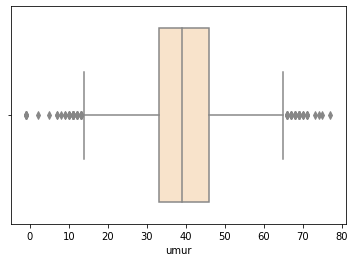

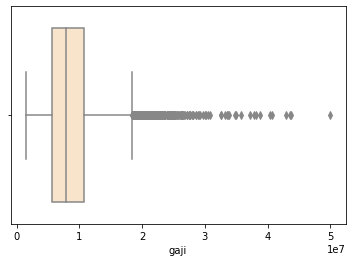

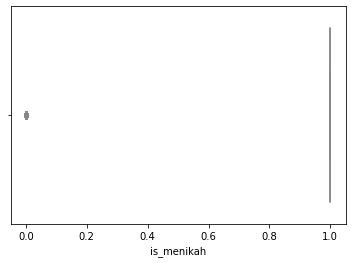

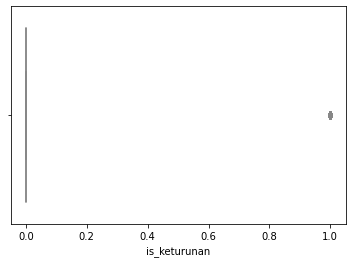

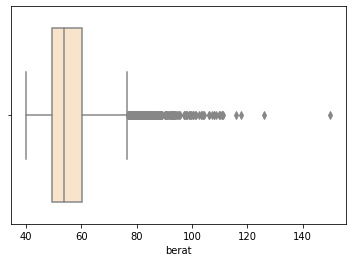

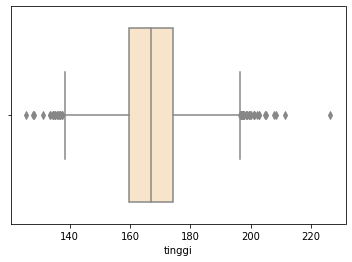

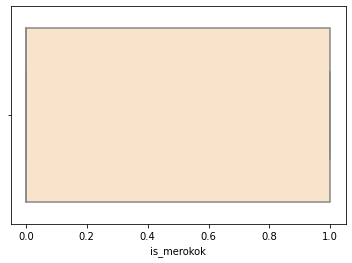

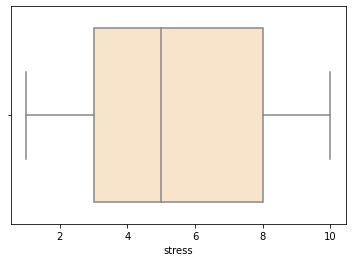

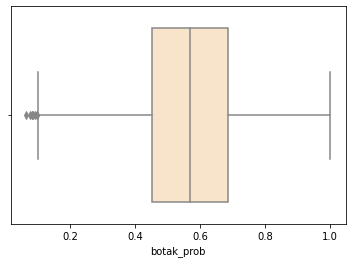

In [ ]:
kolom = data_botak.columns.values
for i in kolom:
  if data_botak[i].dtype == 'float64' or data_botak[i].dtype == 'int64':
    sns.boxplot(data_botak[i], color = 'bisque')
    plt.show()

Outlier akan dibiarkan dan tidak diubah nilai nya karena menurut kami nilai outlier tersebut terjustifikasi dan normal untuk terjadi, dengan pengecualian untuk 1 outler pada kolom tinggi dan berat di mana tinggi untuk ukuran orang Indonesia sangat jarang dan tidak mungkin > 200 cm dan berat untuk ukuran orang Indonesia sangat jarang > 115 kg, sehingga baris-baris yang memuat value lebih dari batas tersebut akan didrop

In [ ]:
data_botak.drop(data_botak[data_botak["tinggi"] > 200].index, axis = 0, inplace=True)
data_botak.drop(data_botak[data_botak["berat"] > 115].index, axis = 0, inplace=True)

#Menghapus data yang umur nya ada -1
data_botak.drop(data_botak[data_botak["umur"] == -1.000000].index, axis = 0, inplace=True)

In [ ]:
data_botak.describe()

umur          gaji   is_menikah  is_keturunan        berat  \
count  7734.000000  7.740000e+03  7743.000000   7725.000000  7757.000000   
mean     39.493923  8.843403e+06     0.978949      0.205049    55.876962   
std       9.885529  4.487570e+06     0.143565      0.403763     9.375688   
min       2.000000  1.500000e+06     0.000000      0.000000    40.000000   
25%      33.000000  5.730662e+06     1.000000      0.000000    49.302610   
50%      39.000000  7.836450e+06     1.000000      0.000000    53.822172   
75%      46.000000  1.081736e+07     1.000000      0.000000    60.235825   
max      77.000000  5.000000e+07     1.000000      1.000000   111.117307   

            tinggi   is_merokok       stress   botak_prob  
count  7739.000000  7744.000000  7751.000000  7735.000000  
mean    167.165578     0.497934     5.450135     0.573760  
std      10.825417     0.500028     2.864881     0.173438  
min     125.491784     0.000000     1.000000     0.064633  
25%     159.740845     0.000000     3.000000     0.451838  
50%     167.106321     0.000000     5.000000     0.567983  
75%     174.383130     1.000000     8.000000     0.686758  
max     199.940689     1.000000    10.000000     1.000000

### <h1> Missing Value </h1>

In [ ]:
#Jumlah Missing Values pada setiap variabel/kolom
print(data_botak.isna().sum().to_frame('Jumlah missing value'), end = '\n\n')

#Persentase Missing Value pada setiap variabel/kolom
print((data_botak.isnull().sum()/len(data_botak)*100).to_frame('Persentase missing value'))

               Jumlah missing value
umur                             79
jenis_kelamin                    75
pekerjaan                       154
provinsi                         85
gaji                             73
is_menikah                       70
is_keturunan                     88
berat                            56
tinggi                           74
sampo                            59
is_merokok                       69
pendidikan                       69
stress                           62
botak_prob                       78

               Persentase missing value
umur                           1.011135
jenis_kelamin                  0.959939
pekerjaan                      1.971074
provinsi                       1.087930
gaji                           0.934340
is_menikah                     0.895943
is_keturunan                   1.126328
berat                          0.716754
tinggi                         0.947139
sampo                          0.755152
is_merokok         

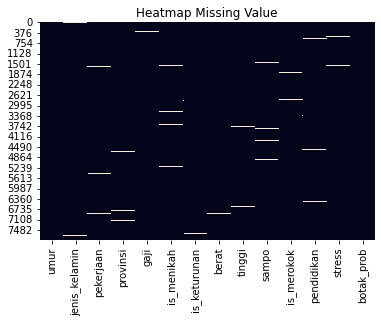

In [ ]:
sns.heatmap(data_botak.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

#Missing at Random

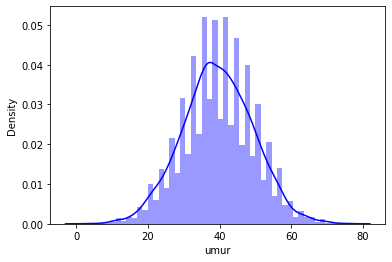

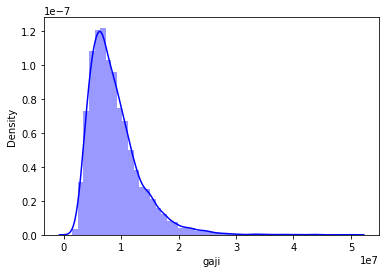

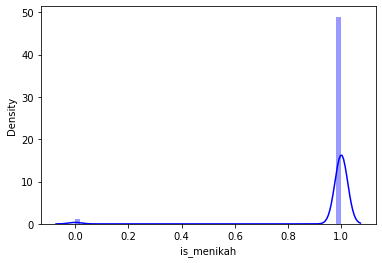

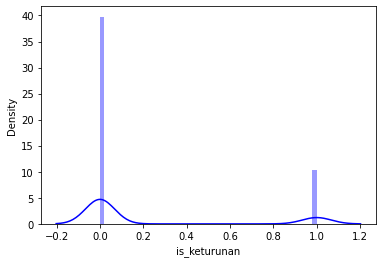

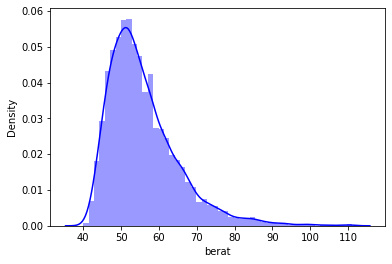

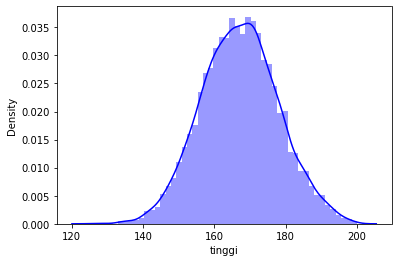

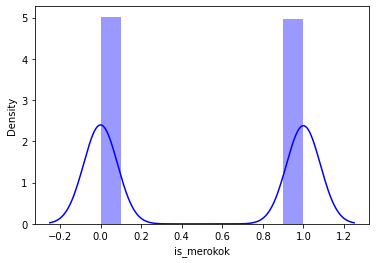

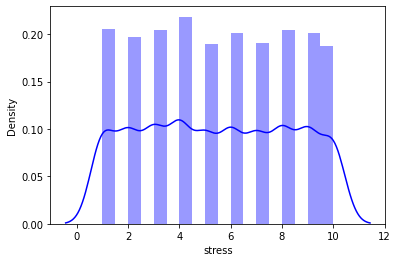

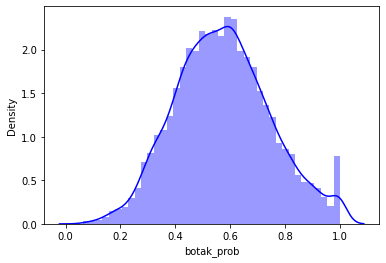

In [ ]:
kolom = data_botak.columns.values
for i in kolom:
  if data_botak[i].dtype == 'float64' or data_botak[i].dtype == 'int64':
    sns.distplot(data_botak[i], color = 'blue')
    plt.show()

In [ ]:
data_botak.describe()

umur          gaji   is_menikah  is_keturunan        berat  \
count  7734.000000  7.740000e+03  7743.000000   7725.000000  7757.000000   
mean     39.493923  8.843403e+06     0.978949      0.205049    55.876962   
std       9.885529  4.487570e+06     0.143565      0.403763     9.375688   
min       2.000000  1.500000e+06     0.000000      0.000000    40.000000   
25%      33.000000  5.730662e+06     1.000000      0.000000    49.302610   
50%      39.000000  7.836450e+06     1.000000      0.000000    53.822172   
75%      46.000000  1.081736e+07     1.000000      0.000000    60.235825   
max      77.000000  5.000000e+07     1.000000      1.000000   111.117307   

            tinggi   is_merokok       stress   botak_prob  
count  7739.000000  7744.000000  7751.000000  7735.000000  
mean    167.165578     0.497934     5.450135     0.573760  
std      10.825417     0.500028     2.864881     0.173438  
min     125.491784     0.000000     1.000000     0.064633  
25%     159.740845     0.000000     3.000000     0.451838  
50%     167.106321     0.000000     5.000000     0.567983  
75%     174.383130     1.000000     8.000000     0.686758  
max     199.940689     1.000000    10.000000     1.000000

In [ ]:
#Beberapa missing value akan diimputasi 
#Umur diimputasi dengan median karena pada plot distribusi nya itu umur cenderung terpusat di tengah, jadi pakai median (karena median itu nilai tengah)
#Serta nilai dari median itu bulat, sedangkan mean tidak bulat, dan umur itu seharusnya bulat tidak ada koma
data_botak['umur'] =data_botak['umur'].fillna(data_botak['umur'].median())

#Tinggi diimputasi dengan nilai kuantil ke-62.5
data_botak['tinggi'] =data_botak['tinggi'].fillna(np.nanpercentile(data_botak["tinggi"], 62.5))

#Gaji dan berat akan diimputasi dengan nilai kuantil ke-25% karena dari distribusi dapat dilihat nilai nya cenderung berpusat di kuantil ke-25%
data_botak['gaji'] =data_botak['gaji'].fillna(np.nanpercentile(data_botak["gaji"], 25))
data_botak['berat'] =data_botak['berat'].fillna(np.nanpercentile(data_botak["berat"], 25))

#Botak_prob tidak akan diimputasi karena justru itu variabel dependen nya, jadi esensi
#membuat model regresi linier akan hilang ketika kita mengimputasi / memasukkan sendiri
#nilai dari variabel dependennya kasarnya

#Beberapa baris yang ada missing value akan didrop karena jumlah baris yang didrop
#tidak akan berpengaruh signifikan ke data secara keseluruhan, dalam artian
#1 kolom dari 7 ribu ratusan baris maskimal hanya 70 an baris saja yang ada missing value 
data_botak.dropna(inplace=True)

In [ ]:
#Jumlah Missing Values pada setiap variabel/kolom
print(data_botak.isna().sum().to_frame('Jumlah missing value'), end = '\n\n')

#Persentase Missing Value pada setiap variabel/kolom
print((data_botak.isnull().sum()/len(data_botak)*100).to_frame('Persentase missing value'), end ="\n\n" )

               Jumlah missing value
umur                              0
jenis_kelamin                     0
pekerjaan                         0
provinsi                          0
gaji                              0
is_menikah                        0
is_keturunan                      0
berat                             0
tinggi                            0
sampo                             0
is_merokok                        0
pendidikan                        0
stress                            0
botak_prob                        0

               Persentase missing value
umur                                0.0
jenis_kelamin                       0.0
pekerjaan                           0.0
provinsi                            0.0
gaji                                0.0
is_menikah                          0.0
is_keturunan                        0.0
berat                               0.0
tinggi                              0.0
sampo                               0.0
is_merokok         

In [ ]:
#Mengecek baris dataset
data_botak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7041 non-null   float64
 1   jenis_kelamin  7041 non-null   object 
 2   pekerjaan      7041 non-null   object 
 3   provinsi       7041 non-null   object 
 4   gaji           7041 non-null   float64
 5   is_menikah     7041 non-null   float64
 6   is_keturunan   7041 non-null   float64
 7   berat          7041 non-null   float64
 8   tinggi         7041 non-null   float64
 9   sampo          7041 non-null   object 
 10  is_merokok     7041 non-null   float64
 11  pendidikan     7041 non-null   object 
 12  stress         7041 non-null   float64
 13  botak_prob     7041 non-null   float64
dtypes: float64(9), object(5)
memory usage: 825.1+ KB


## <h1> Normalization and Standardization </h1>

In [ ]:
#Dalam melakukan normalisasi dan standardisasi sengaja dibuat kolom baru
#karena nanti dalam visualisasi akan lebih mudah dan terlihat ketika bekerja dengan data asli
#tetapi ketika melakukan regresi linear akan lebih baik ketika menggunakan data yang sudah
#ternormalisasi dan terstandarisasi
data_botak['berat_nrm'] = MinMaxScaler().fit_transform(data_botak['berat'].values.reshape(len(data_botak), 1))
data_botak['tinggi_nrm'] = MinMaxScaler().fit_transform(data_botak['tinggi'].values.reshape(len(data_botak), 1))
data_botak['umur_std'] = StandardScaler().fit_transform(data_botak['umur'].values.reshape(len(data_botak), 1))
data_botak['gaji_std'] = StandardScaler().fit_transform(data_botak['gaji'].values.reshape(len(data_botak), 1))

In [ ]:
data_botak.describe()

umur          gaji   is_menikah  is_keturunan        berat  \
count  7041.000000  7.041000e+03  7041.000000   7041.000000  7041.000000   
mean     39.487999  8.813596e+06     0.979548      0.204516    55.808653   
std       9.866533  4.473591e+06     0.141549      0.403376     9.372732   
min       2.000000  1.500000e+06     0.000000      0.000000    40.319619   
25%      33.000000  5.730662e+06     1.000000      0.000000    49.302610   
50%      39.000000  7.789390e+06     1.000000      0.000000    53.731366   
75%      46.000000  1.078095e+07     1.000000      0.000000    60.115518   
max      77.000000  5.000000e+07     1.000000      1.000000   111.117307   

            tinggi   is_merokok       stress   botak_prob    berat_nrm  \
count  7041.000000  7041.000000  7041.000000  7041.000000  7041.000000   
mean    167.179631     0.497657     5.437864     0.574036     0.218779   
std      10.804713     0.500030     2.871318     0.174043     0.132388   
min     127.993496     0.000000     1.000000     0.064633     0.000000   
25%     159.744434     0.000000     3.000000     0.452962     0.126883   
50%     167.233602     0.000000     5.000000     0.567999     0.189438   
75%     174.338552     1.000000     8.000000     0.686857     0.279612   
max     199.940689     1.000000    10.000000     1.000000     1.000000   

        tinggi_nrm      umur_std      gaji_std  
count  7041.000000  7.041000e+03  7.041000e+03  
mean      0.544651 -8.073203e-18  1.584366e-16  
std       0.150176  1.000071e+00  1.000071e+00  
min       0.000000 -3.799781e+00 -1.634954e+00  
25%       0.441309 -6.576231e-01 -6.891899e-01  
50%       0.545401 -4.946353e-02 -2.289613e-01  
75%       0.644154  6.600559e-01  4.398007e-01  
max       1.000000  3.802214e+00  9.207218e+00

##<h1> Mendapatkan info dari variabel kategorik

In [ ]:
#Mengubah tipe data dari object ke categoric
data_botak['pekerjaan'] = data_botak['pekerjaan'].astype('category')
data_botak['provinsi'] = data_botak['provinsi'].astype('category')
data_botak['pendidikan'] = data_botak['pendidikan'].astype('category')
data_botak['sampo'] = data_botak['sampo'].astype('category')

In [ ]:
banyak_pekerjaan = data_botak['pekerjaan'].unique()
banyak_per_pekerjaan = Counter(data_botak['pekerjaan'])
print('Banyaknya jenis pekerjaan: {}'.format(len(banyak_pekerjaan)))
print(banyak_per_pekerjaan)
print(banyak_pekerjaan, '\n')

banyak_provinsi = data_botak['provinsi'].unique()
banyak_per_provinsi = Counter(data_botak['provinsi'])
print('Banyaknya jenis provinsi: {}'.format(len(banyak_provinsi)))
print(banyak_per_provinsi)
print(banyak_provinsi, '\n')

banyak_sampo = data_botak['sampo'].unique()
banyak_per_sampo = Counter(data_botak['sampo'])
print('Banyaknya jenis sampo: {}'.format(len(banyak_sampo)))
print(banyak_per_sampo)
print(banyak_sampo, '\n')

banyak_pendidikan = data_botak['pendidikan'].unique()
banyak_per_pendidikan = Counter(data_botak['pendidikan'])
print('Banyaknya jenis pendidikan: {}'.format(len(banyak_pendidikan)))
print(banyak_per_pendidikan)
print(banyak_pendidikan)

Banyaknya jenis pekerjaan: 4
Counter({'Pegawai swasta': 2877, 'PNS': 2825, 'Freelance': 1044, 'Pengangguran': 295})
['PNS', 'Pegawai swasta', 'Pengangguran', 'Freelance']
Categories (4, object): ['Freelance', 'PNS', 'Pegawai swasta', 'Pengangguran'] 

Banyaknya jenis provinsi: 34
Counter({'Kupang': 233, 'Makassar': 225, 'Denpasar': 224, 'Semarang': 222, 'Banjarmasin': 221, 'Tanjungselor': 220, 'Bengkulu': 215, 'Pontianak': 215, 'Ambon': 214, 'Gorontalo': 214, 'Mataram': 213, 'Mamuju': 210, 'Manado': 210, 'Serang': 208, 'Pekanbaru': 208, 'Kendari': 208, 'Pangkalpinang': 207, 'Jakarta': 207, 'Jayapura': 207, 'Tanjung Pinang': 205, 'Jambi': 205, 'Manokwari': 203, 'Banda Lampung': 203, 'Samarinda': 203, 'Banda Aceh': 201, 'Yogyakarta': 200, 'Palu': 198, 'Palangkaraya': 198, 'Medan': 198, 'Sofifi': 196, 'Palembang': 193, 'Padang': 192, 'Bandung': 187, 'Surabaya': 178})
['Bengkulu', 'Bandung', 'Palu', 'Palangkaraya', 'Serang', ..., 'Medan', 'Kendari', 'Gorontalo', 'Samarinda', 'Padang']
Leng

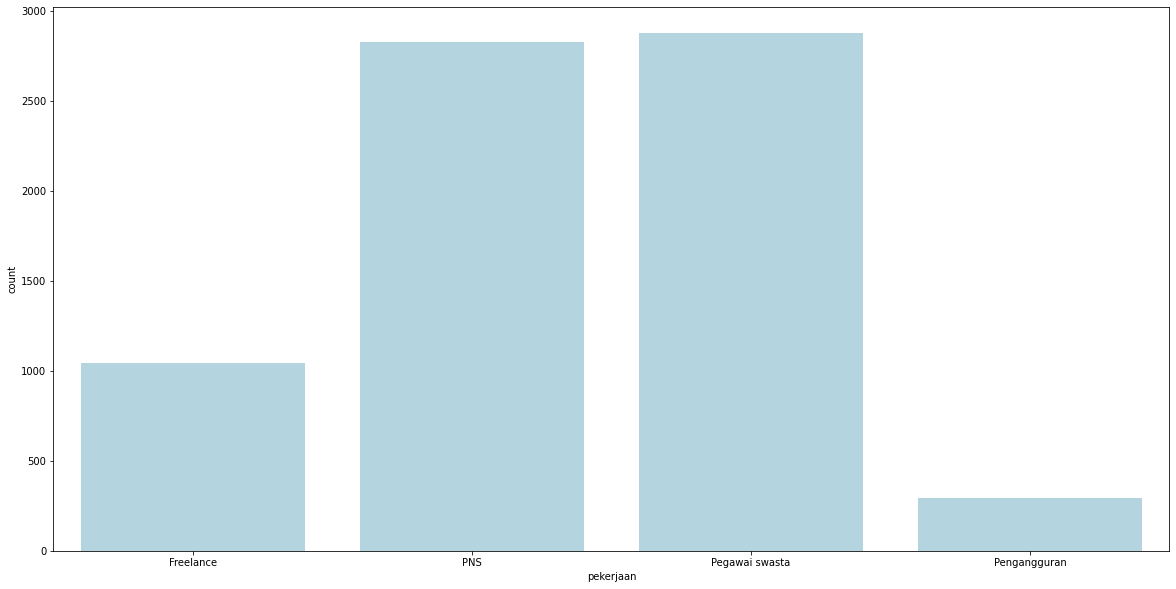

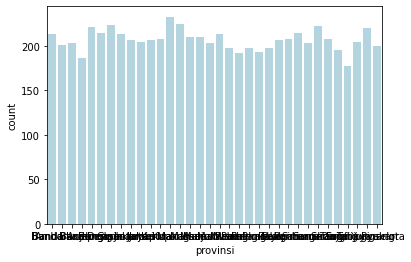

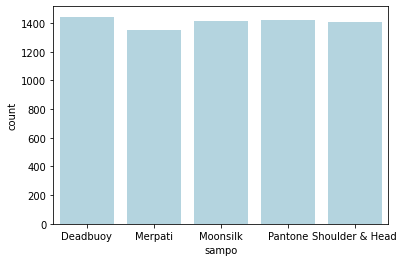

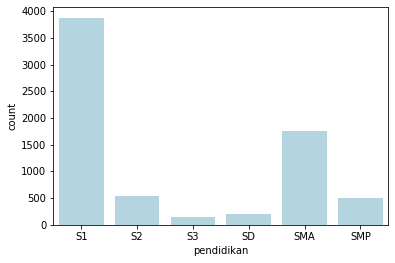

In [ ]:
kolom = data_botak.columns.values
plt.figure(figsize=(20,10))
for i in kolom:
  if data_botak[i].dtype == 'category':
    sns.countplot(data_botak[i], color = 'lightblue')
    plt.show()
    print("\n")

##<h1> Membuat *one hot encoder* dari variabel jenis_kelamin </h1>

In [ ]:
data_botak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7041 non-null   float64
 1   jenis_kelamin  7041 non-null   object 
 2   pekerjaan      7041 non-null   object 
 3   provinsi       7041 non-null   object 
 4   gaji           7041 non-null   float64
 5   is_menikah     7041 non-null   float64
 6   is_keturunan   7041 non-null   float64
 7   berat          7041 non-null   float64
 8   tinggi         7041 non-null   float64
 9   sampo          7041 non-null   object 
 10  is_merokok     7041 non-null   float64
 11  pendidikan     7041 non-null   object 
 12  stress         7041 non-null   float64
 13  botak_prob     7041 non-null   float64
 14  berat_nrm      7041 non-null   float64
 15  tinggi_nrm     7041 non-null   float64
 16  umur_std       7041 non-null   float64
 17  gaji_std       7041 non-null   float64
dtypes: float

In [ ]:
data_botak.head()

umur jenis_kelamin       pekerjaan      provinsi         gaji  is_menikah  \
0  27.0     Perempuan             PNS      Bengkulu  7957452.757         1.0   
1  53.0     Perempuan             PNS       Bandung  7633002.755         1.0   
2  37.0     Perempuan  Pegawai swasta       Bandung  6637624.864         1.0   
3  36.0     Perempuan    Pengangguran          Palu  3624871.391         1.0   
4  38.0     Laki-laki       Freelance  Palangkaraya  6031807.520         1.0   

   is_keturunan      berat      tinggi     sampo  is_merokok pendidikan  \
0           0.0  54.315053  170.428542   Pantone         1.0         S1   
1           0.0  72.873404  165.530097   Pantone         0.0         S1   
2           0.0  46.321533  154.599388  Moonsilk         0.0         S1   
3           0.0  51.539781  167.340481  Deadbuoy         1.0         SD   
4           0.0  60.726909  165.514773   Merpati         1.0         S2   

   stress  botak_prob  berat_nrm  tinggi_nrm  umur_std  gaji_std  
0     5.0    0.605974   0.197682    0.589808 -1.265783 -0.191391  
1     7.0    0.532860   0.459814    0.521724  1.369575 -0.263922  
2     4.0    0.418442   0.084776    0.369798 -0.252183 -0.486438  
3     9.0    0.804050   0.158482    0.546887 -0.353543 -1.159939  
4     1.0    0.368371   0.288248    0.521511 -0.150823 -0.621869

In [ ]:
#Membuat encoding dari variabel jenis_kelamin
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].str.replace('Laki-laki', '1.0')
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].str.replace('Perempuan', '0.0')
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('float64')

data_botak.head()

umur  jenis_kelamin       pekerjaan      provinsi         gaji  is_menikah  \
0  27.0            0.0             PNS      Bengkulu  7957452.757         1.0   
1  53.0            0.0             PNS       Bandung  7633002.755         1.0   
2  37.0            0.0  Pegawai swasta       Bandung  6637624.864         1.0   
3  36.0            0.0    Pengangguran          Palu  3624871.391         1.0   
4  38.0            1.0       Freelance  Palangkaraya  6031807.520         1.0   

   is_keturunan      berat      tinggi     sampo  is_merokok pendidikan  \
0           0.0  54.315053  170.428542   Pantone         1.0         S1   
1           0.0  72.873404  165.530097   Pantone         0.0         S1   
2           0.0  46.321533  154.599388  Moonsilk         0.0         S1   
3           0.0  51.539781  167.340481  Deadbuoy         1.0         SD   
4           0.0  60.726909  165.514773   Merpati         1.0         S2   

   stress  botak_prob  berat_nrm  tinggi_nrm  umur_std  gaji_std  
0     5.0    0.605974   0.197682    0.589808 -1.265783 -0.191391  
1     7.0    0.532860   0.459814    0.521724  1.369575 -0.263922  
2     4.0    0.418442   0.084776    0.369798 -0.252183 -0.486438  
3     9.0    0.804050   0.158482    0.546887 -0.353543 -1.159939  
4     1.0    0.368371   0.288248    0.521511 -0.150823 -0.621869

In [ ]:
data_botak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   umur           7041 non-null   float64 
 1   jenis_kelamin  7041 non-null   float64 
 2   pekerjaan      7041 non-null   category
 3   provinsi       7041 non-null   category
 4   gaji           7041 non-null   float64 
 5   is_menikah     7041 non-null   float64 
 6   is_keturunan   7041 non-null   float64 
 7   berat          7041 non-null   float64 
 8   tinggi         7041 non-null   float64 
 9   sampo          7041 non-null   category
 10  is_merokok     7041 non-null   float64 
 11  pendidikan     7041 non-null   category
 12  stress         7041 non-null   float64 
 13  botak_prob     7041 non-null   float64 
 14  berat_nrm      7041 non-null   float64 
 15  tinggi_nrm     7041 non-null   float64 
 16  umur_std       7041 non-null   float64 
 17  gaji_std       7041 non-null   fl

## <h1> Mencari Koefisien Korelasi Antar Variabel </h1>

In [ ]:
nums = ["jenis_kelamin", "is_menikah", "is_keturunan", "is_merokok", "stress", "berat_nrm", "tinggi_nrm", "umur_std", "gaji_std", "botak_prob"]
korelasi_variabel = data_botak[nums].corr()
korelasi_variabel

jenis_kelamin  is_menikah  is_keturunan  is_merokok    stress  \
jenis_kelamin       1.000000    0.005340     -0.010410    0.016973  0.001562   
is_menikah          0.005340    1.000000     -0.003855    0.001330 -0.006273   
is_keturunan       -0.010410   -0.003855      1.000000   -0.018046  0.000426   
is_merokok          0.016973    0.001330     -0.018046    1.000000 -0.013581   
stress              0.001562   -0.006273      0.000426   -0.013581  1.000000   
berat_nrm           0.006458    0.004588      0.001628   -0.000717 -0.012393   
tinggi_nrm          0.020253    0.010026      0.003998    0.000163  0.006522   
umur_std           -0.005347    0.344004     -0.014980    0.009819 -0.020760   
gaji_std           -0.004817   -0.013827     -0.008388   -0.009049  0.014971   
botak_prob          0.258223    0.128351      0.443377    0.268547  0.294106   

               berat_nrm  tinggi_nrm  umur_std  gaji_std  botak_prob  
jenis_kelamin   0.006458    0.020253 -0.005347 -0.004817    0.258223  
is_menikah      0.004588    0.010026  0.344004 -0.013827    0.128351  
is_keturunan    0.001628    0.003998 -0.014980 -0.008388    0.443377  
is_merokok     -0.000717    0.000163  0.009819 -0.009049    0.268547  
stress         -0.012393    0.006522 -0.020760  0.014971    0.294106  
berat_nrm       1.000000    0.383696  0.005893  0.006702   -0.003016  
tinggi_nrm      0.383696    1.000000 -0.001239  0.014064    0.012152  
umur_std        0.005893   -0.001239  1.000000  0.010187    0.356875  
gaji_std        0.006702    0.014064  0.010187  1.000000    0.052668  
botak_prob     -0.003016    0.012152  0.356875  0.052668    1.000000

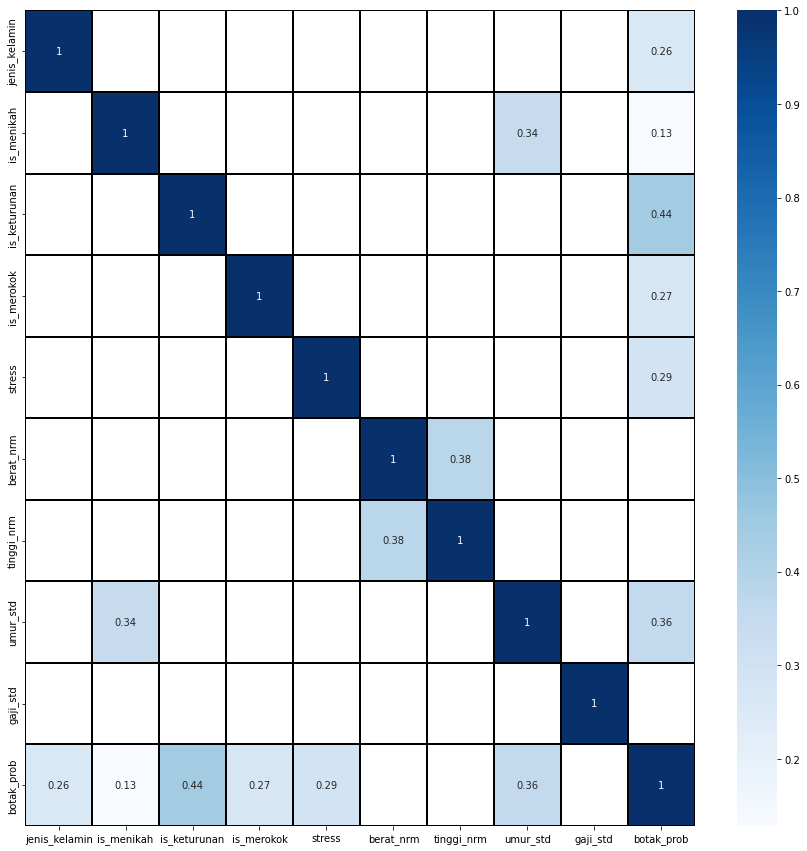

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(korelasi_variabel[(korelasi_variabel >= 0.1) | (korelasi_variabel <= -0.1)], annot = True, cmap = 'Blues', linewidth = 1, linecolor = 'black', ax = ax)

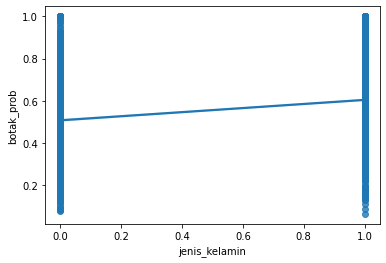

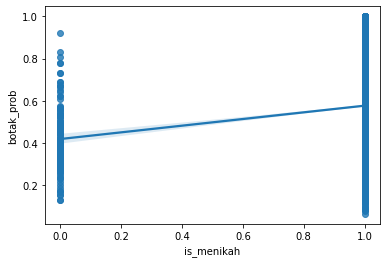

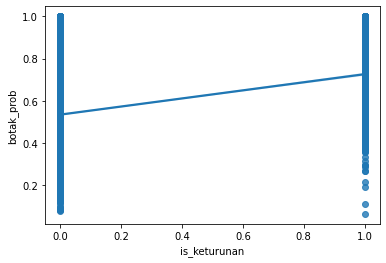

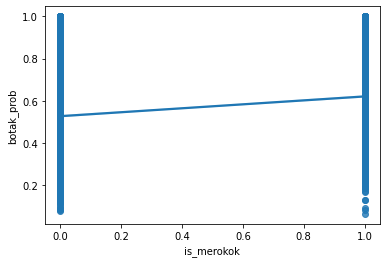

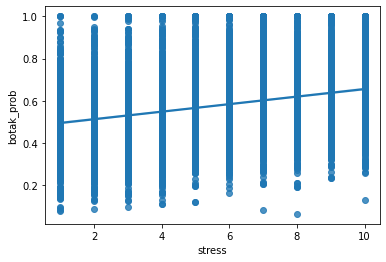

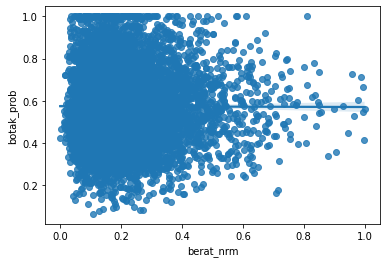

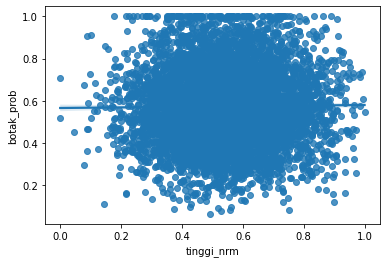

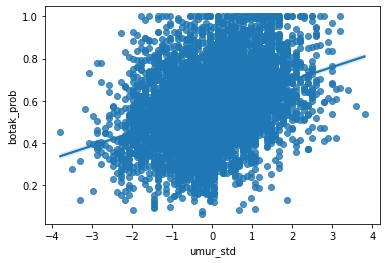

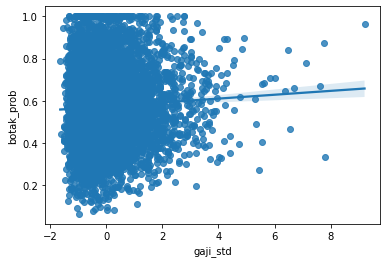

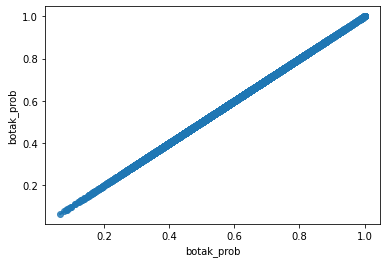

In [ ]:
#Mengkonfirmasi Ketidak-korelasian linier Beberapa Variabel dengan Variabel botak_prob
numerical_var = data_botak[nums]
for i in numerical_var:
    if data_botak[i].dtype=='float64'or data_botak[i].dtype=='int64':
       sns.regplot(x=data_botak[i], y="botak_prob", data=data_botak)
       plt.show()
       print('\n')

Urutan ke-terkuatan:
1. Sangat kuat $(0.8$ sampai $1.0$ dan $-0.8$ sampai $-1.0)$
2. Kuat $(0.6$ sampai $0.7999...9$ dan $-0.6$ sampai $-0.7999...9)$
3. Cukup kuat $(0.4$ sampai $0.5999...9$ dan $-0.4$ sampai $-0.5999...9)$
4. Sedikit kuat $(0.2$ sampai $0.3999...9$ dan $-0.2$ sampai $-0.3999...9)$
5. Sangat sedikit kuat $(0$ sampai $0.1999...9$ dan $0$ sampai $-0.1999...9)$

Dari heatmap dan plot tersebut dapat dilihat bahwa ada 7 variabel yang cukup berkorelasi dengan variabel botak_prob dengan detail nya adalah:
1. Variabel **jenis_kelamin** berkorelasi sedikit kuat
2. Variaebl **is_menikah** berkorelasi sangat sedikit kuat
3. Variabel **is_keturunan** berkorelasi cukup kuat
4. Variabel **is_merokok** berkorelasi sedikit kuat
5. Variabel **stress** berkorelasi sedikit kuat
6. Variabel **umur_std** berkorelasi sedikit kuat 

# <h1> Visualisasi </h1>

Notes:
1. sns.catplot() untuk 1 kategorik dan 1 numerik
2. sns.jointplot() untuk 2 numerik (bisa juga 1 kategorik 1 numerik, tapi kurang ideal)
3. sns.catplot() dengan hue nya kategorik untuk 2 kategorik dan 1 numerik
4. geom.boxplot() untuk 2 kategorik dan 1 numerik
5. geom.point() untuk 2 numerik dan 1 kategorik

In [ ]:
data_botak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7041 non-null   float64
 1   jenis_kelamin  7041 non-null   float64
 2   pekerjaan      7041 non-null   object 
 3   provinsi       7041 non-null   object 
 4   gaji           7041 non-null   float64
 5   is_menikah     7041 non-null   float64
 6   is_keturunan   7041 non-null   float64
 7   berat          7041 non-null   float64
 8   tinggi         7041 non-null   float64
 9   sampo          7041 non-null   object 
 10  is_merokok     7041 non-null   float64
 11  pendidikan     7041 non-null   object 
 12  stress         7041 non-null   float64
 13  botak_prob     7041 non-null   float64
 14  berat_nrm      7041 non-null   float64
 15  tinggi_nrm     7041 non-null   float64
 16  umur_std       7041 non-null   float64
 17  gaji_std       7041 non-null   float64
dtypes: float

## 1. pekerjaan, stress, dan botak_prob

###A. pekerjaan dan botak_prob

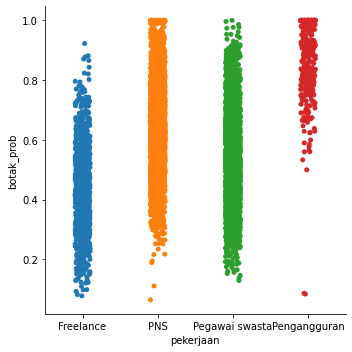

In [ ]:
P1A1 = sns.catplot(x="pekerjaan", y="botak_prob", data=data_botak)

###B. stress dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('float64')

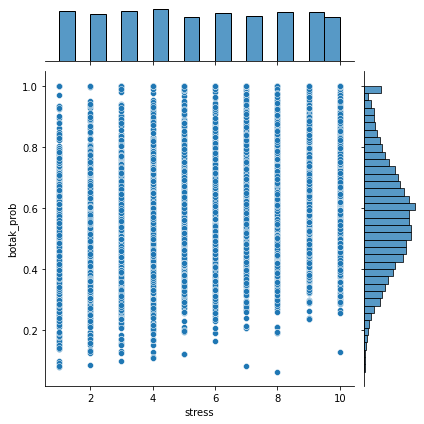

In [ ]:
P1B1 = sns.jointplot(x='stress', y='botak_prob', data = data_botak)

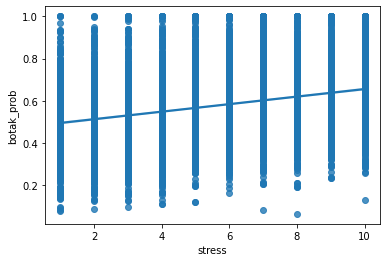

In [ ]:
P1B2 = sns.regplot(x='stress', y="botak_prob", data=data_botak)

###C. pekerjaan, stress, dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('category')

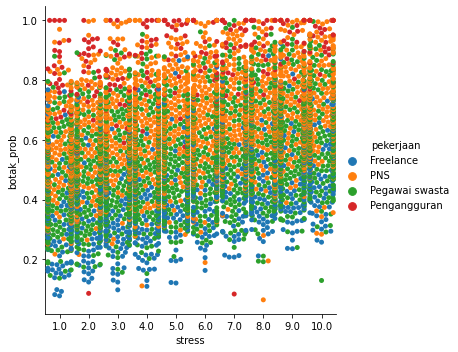

In [ ]:
P1C1 = sns.catplot(x="stress", y="botak_prob", hue="pekerjaan", kind="swarm", data=data_botak)

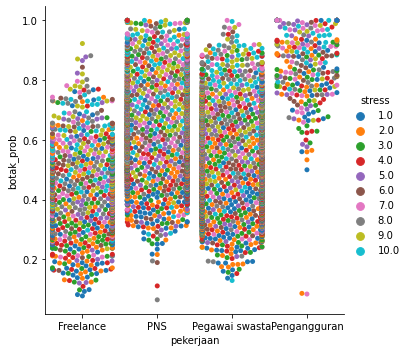

In [ ]:
P1C2 = sns.catplot(x="pekerjaan", y="botak_prob", hue="stress", kind="swarm", data=data_botak)

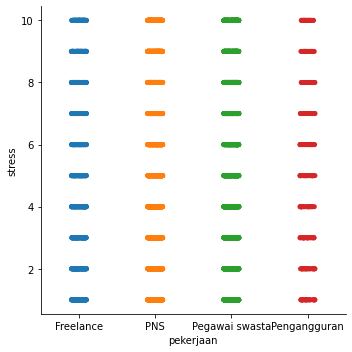

In [ ]:
P1C3 = sns.catplot(x="pekerjaan", y="stress", data=data_botak)

##2. jenis_kelamin, is_menikah, is_keturunan, is_merokok, pekerjaan dan botak_prob

###A. jenis_kelamin dan botak_prob

In [ ]:
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('category')

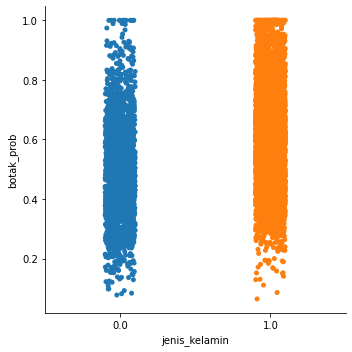

In [ ]:
P2A1 = sns.catplot(x="jenis_kelamin", y="botak_prob", data=data_botak)
P2A1

###B. is_keturunan dan botak_prob

In [ ]:
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

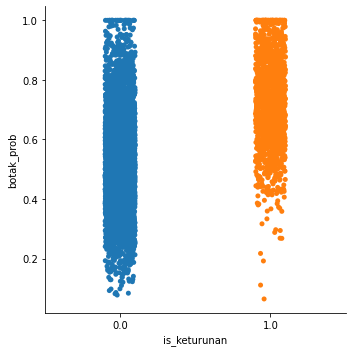

In [ ]:
P2B1 = sns.catplot(x="is_keturunan", y="botak_prob", data=data_botak)
P2B1

###C. is_menikah dan botak_prob

In [ ]:
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

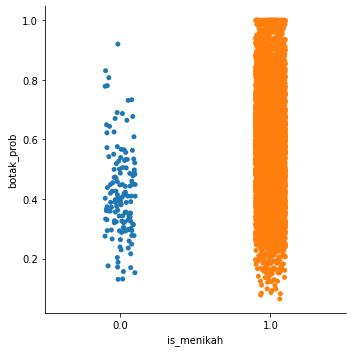

In [ ]:
P2C1 = sns.catplot(x="is_menikah", y="botak_prob", data=data_botak)
P2C1

###D. is_merokok dan botak_prob

In [ ]:
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')

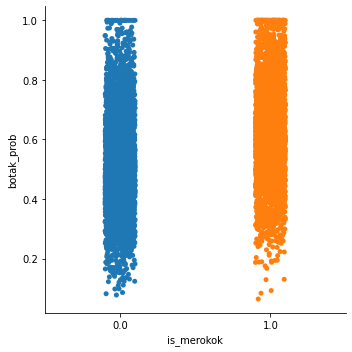

In [ ]:
P2D1 = sns.catplot(x = 'is_merokok', y = 'botak_prob', data = data_botak)
P2D1

###E. is_menikah, is_keturunan, dan botak_prob

In [ ]:
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

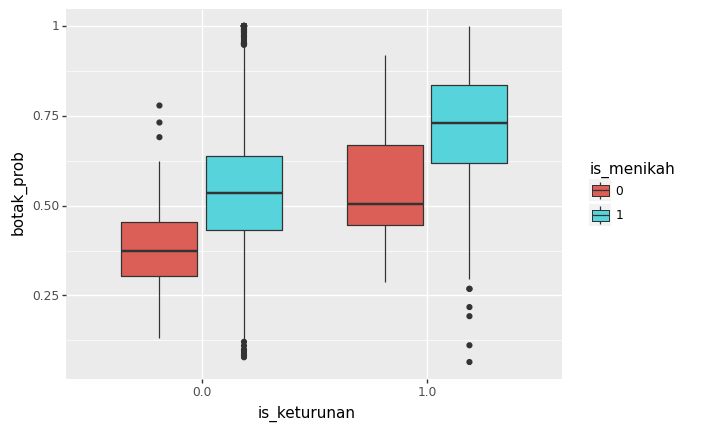

<ggplot: (8773298096009)>

In [ ]:
P2E1 = ggplot(data_botak, aes(x='is_keturunan', y='botak_prob', fill='is_menikah')) + geom_boxplot()
P2E1

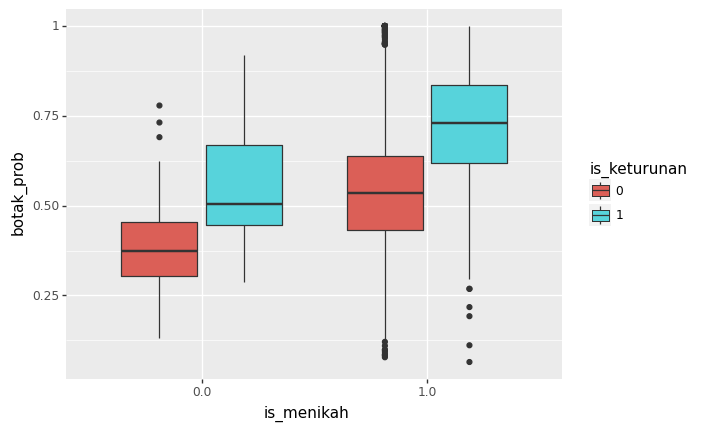

<ggplot: (8773298043961)>

In [ ]:
P2E2 = ggplot(data_botak, aes(x='is_menikah', y='botak_prob', fill='is_keturunan')) + geom_boxplot()
P2E2

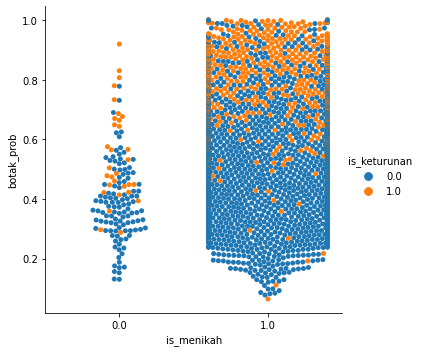

In [ ]:
P2E3 = sns.catplot(x="is_menikah", y="botak_prob", hue="is_keturunan", kind="swarm", data=data_botak)
P2E3

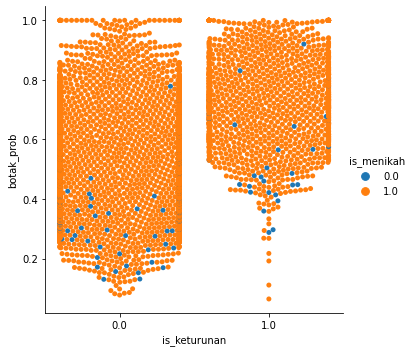

In [ ]:
P2E4 = sns.catplot(x="is_keturunan", y="botak_prob", hue="is_menikah", kind="swarm", data=data_botak)
P2E4

###F. is_keturunan, is_merokok, dan botak_prob

In [ ]:
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

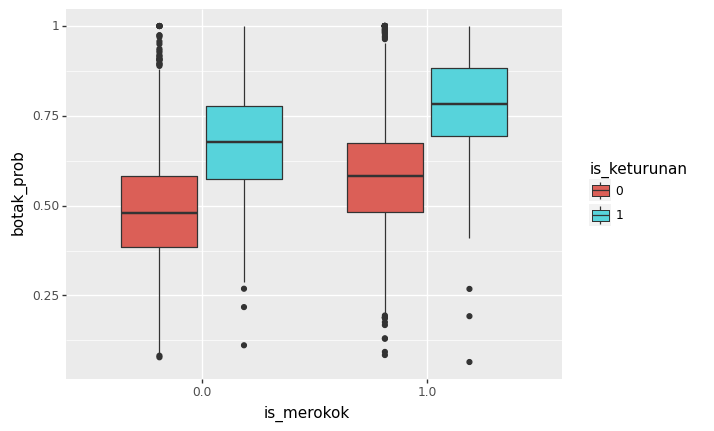

<ggplot: (8773296373981)>

In [ ]:
P2F1 = ggplot(data_botak, aes(x='is_merokok', y='botak_prob', fill='is_keturunan')) + geom_boxplot()
P2F1

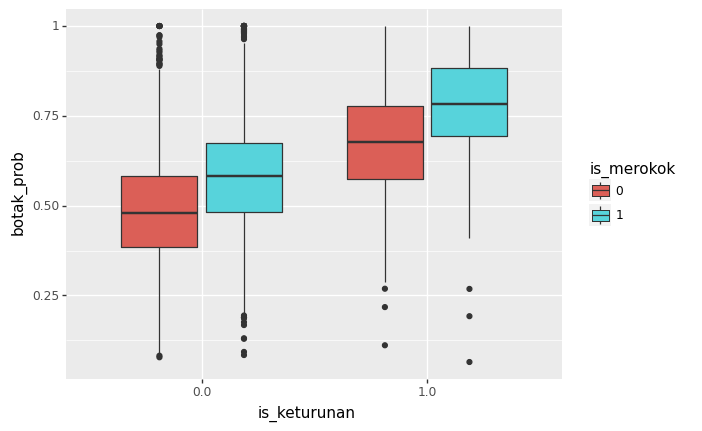

<ggplot: (8773298173393)>

In [ ]:
P2F2 = ggplot(data_botak, aes(x='is_keturunan', y='botak_prob', fill='is_merokok')) + geom_boxplot()
P2F2

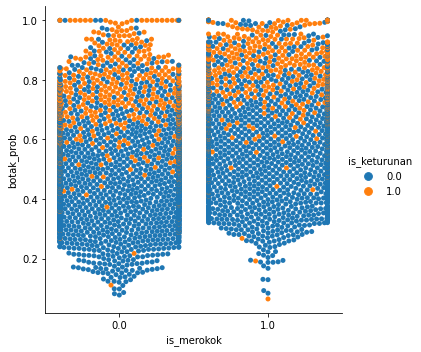

In [ ]:
P2F3 = sns.catplot(x="is_merokok", y="botak_prob", hue="is_keturunan", kind="swarm", data=data_botak)
P2F3

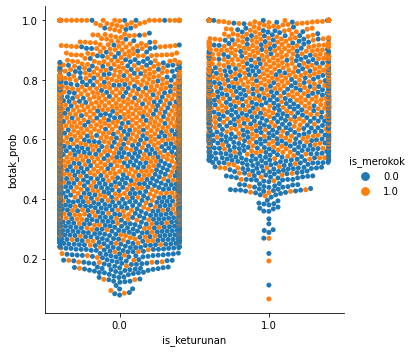

In [ ]:
P2F4 = sns.catplot(x="is_keturunan", y="botak_prob", hue="is_merokok", kind="swarm", data=data_botak)
P2F4

###G. is_menikah, is_merokok, dan botak_prob

In [ ]:
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

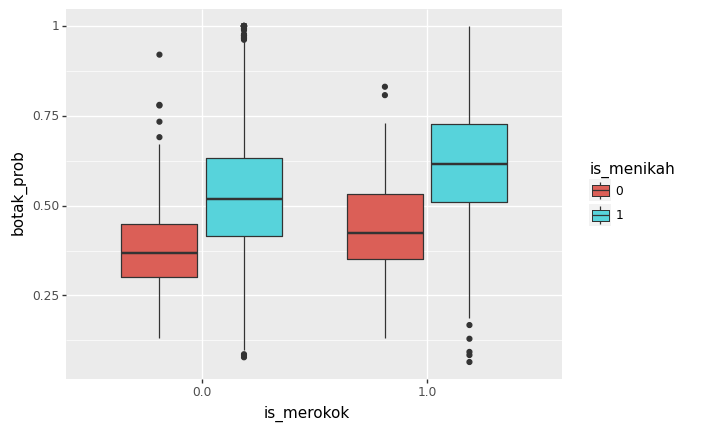

<ggplot: (8773296156717)>

In [ ]:
P2G1 = ggplot(data_botak, aes(x='is_merokok', y='botak_prob', fill='is_menikah')) + geom_boxplot()
P2G1

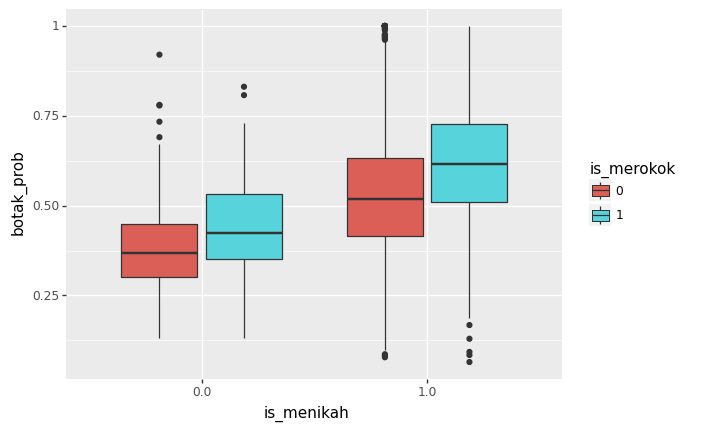

<ggplot: (8773296092281)>

In [ ]:
P2G2 = ggplot(data_botak, aes(x='is_menikah', y='botak_prob', fill='is_merokok')) + geom_boxplot()
P2G2

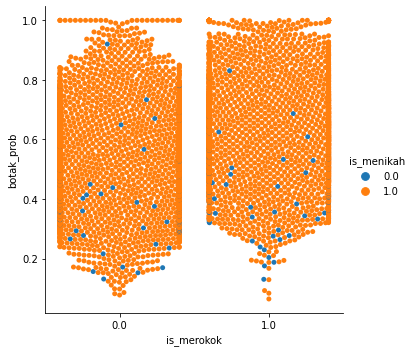

In [ ]:
P2G3 = sns.catplot(x="is_merokok", y="botak_prob", hue="is_menikah", kind="swarm", data=data_botak)
P2G3

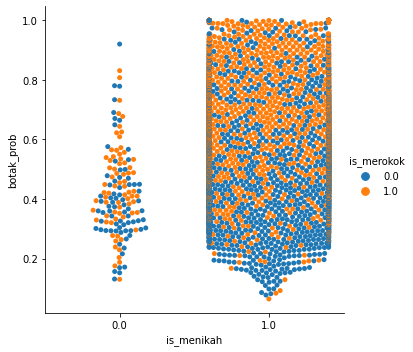

In [ ]:
P2G4 = sns.catplot(x="is_menikah", y="botak_prob", hue="is_merokok", kind="swarm", data=data_botak)
P2G4

###H. jenis_kelamin, is_keturunan, dan botak_prob

In [ ]:
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('category')
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

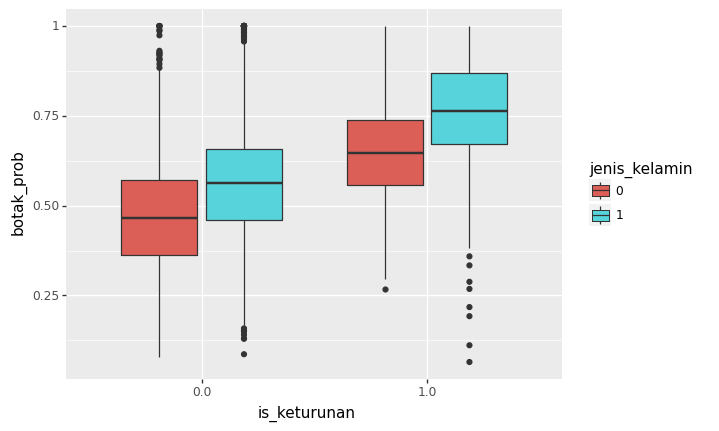

<ggplot: (8773295696649)>

In [ ]:
P2H1 = ggplot(data_botak, aes(x='is_keturunan', y='botak_prob', fill='jenis_kelamin')) + geom_boxplot()
P2H1

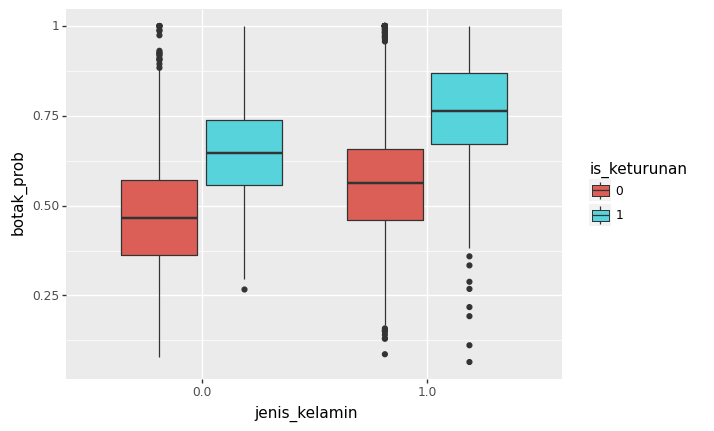

<ggplot: (8773295955833)>

In [ ]:
P2H2 = ggplot(data_botak, aes(x='jenis_kelamin', y='botak_prob', fill='is_keturunan')) + geom_boxplot()
P2H2

###I. jenis_kelamin, is_menikah, dan botak_prob

In [ ]:
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('category')
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

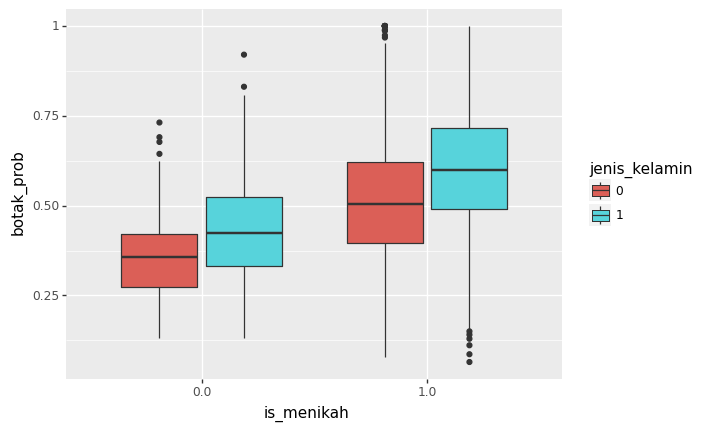

<ggplot: (8773295864565)>

In [ ]:
P2I1 = ggplot(data_botak, aes(x='is_menikah', y='botak_prob', fill='jenis_kelamin')) + geom_boxplot()
P2I1

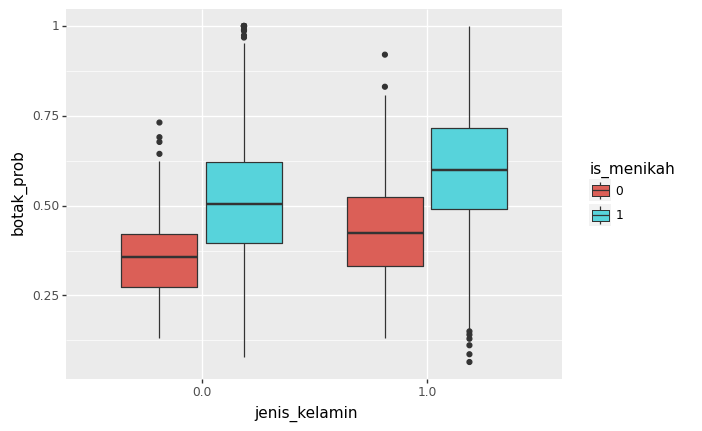

<ggplot: (8773295959877)>

In [ ]:
P2I2 = ggplot(data_botak, aes(x='jenis_kelamin', y='botak_prob', fill='is_menikah')) + geom_boxplot()
P2I2

###J. jenis_kelamin, is_merokok, dan botak_prob

In [ ]:
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('category')
data_botak['is_merokok'] = data_botak['is_menikah'].astype('category')

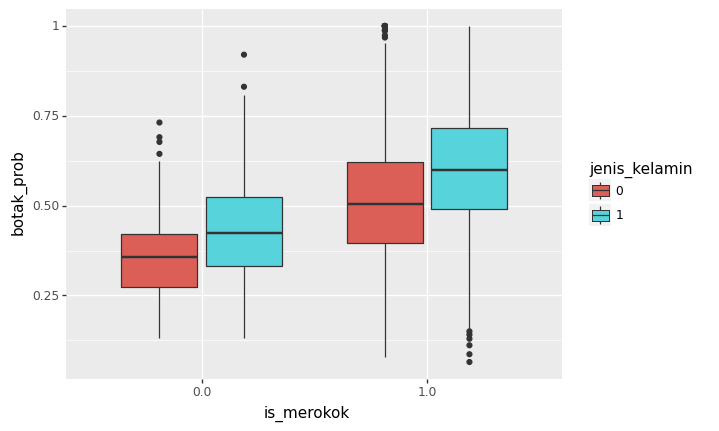

<ggplot: (8773295766985)>

In [ ]:
P2J1 = ggplot(data_botak, aes(x='is_merokok', y='botak_prob', fill='jenis_kelamin')) + geom_boxplot()
P2J1

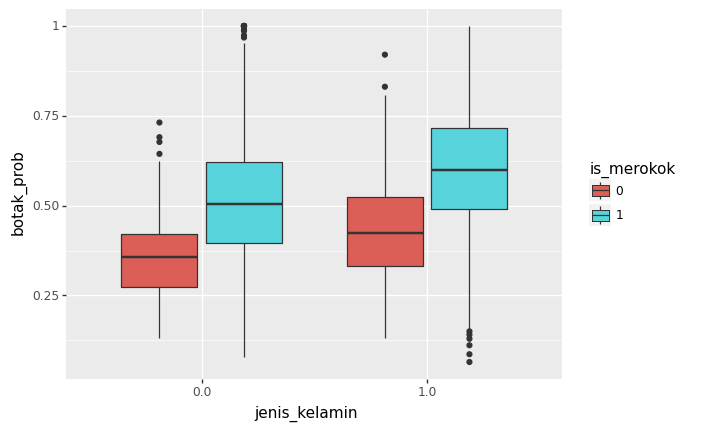

<ggplot: (8773295864353)>

In [ ]:
P2J2 = ggplot(data_botak, aes(x='jenis_kelamin', y='botak_prob', fill='is_merokok')) + geom_boxplot()
P2J2

###K. jenis_kelamin, pekerjaan, dan botak_prob

In [ ]:
data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('category')
data_botak['is_merokok'] = data_botak['is_menikah'].astype('category')

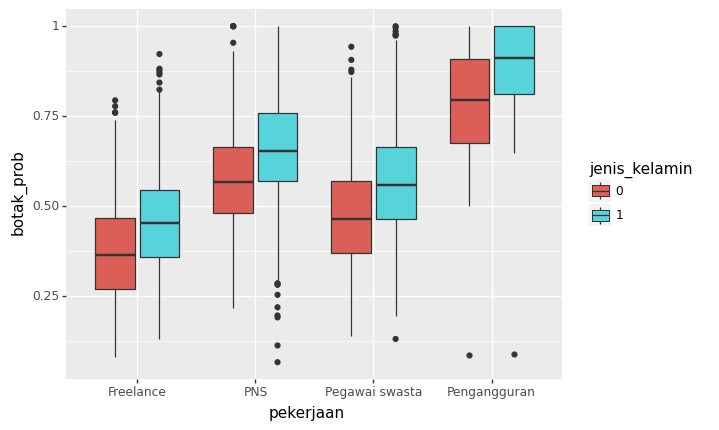

<ggplot: (8745992890545)>

In [ ]:
P2K1 = ggplot(data_botak, aes(x='pekerjaan', y='botak_prob', fill='jenis_kelamin')) + geom_boxplot()
P2K1

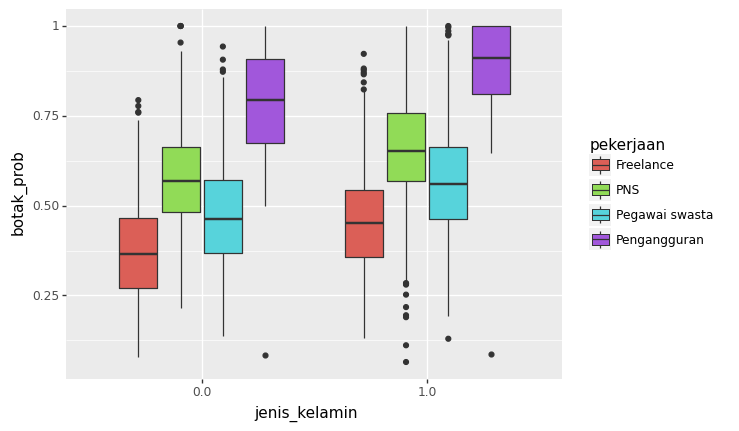

<ggplot: (8745990171493)>

In [ ]:
P2K1 = ggplot(data_botak, aes(x='jenis_kelamin', y='botak_prob', fill='pekerjaan')) + geom_boxplot()
P2K1

##3. pekerjaan, is_keturunan, is_menikah, is_merokok dan botak_prob

###A. pekerjaan, is_keturunan, dan botak_prob

In [ ]:
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

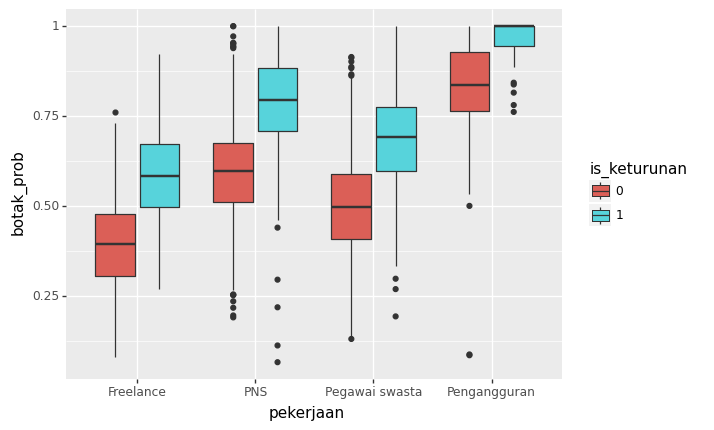

<ggplot: (8773295653857)>

In [ ]:
P3A1 = ggplot(data_botak, aes(x='pekerjaan', y='botak_prob', fill='is_keturunan')) + geom_boxplot()
P3A1

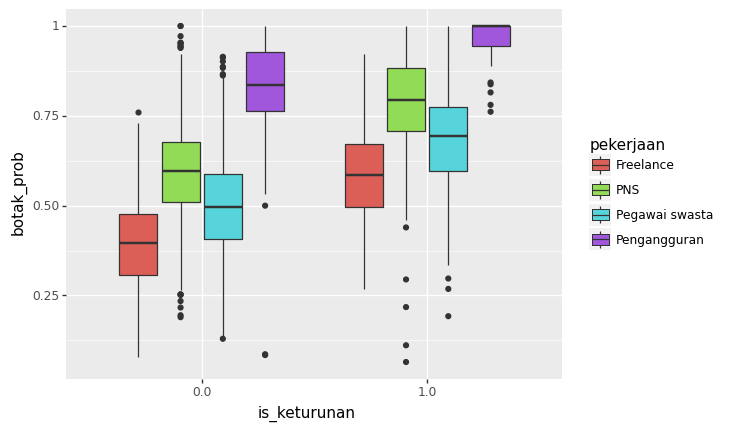

<ggplot: (8773295625917)>

In [ ]:
P3A2 = ggplot(data_botak, aes(x='is_keturunan', y='botak_prob', fill='pekerjaan')) + geom_boxplot()
P3A2

###B. pekerjaan, is_menikah, dan botak_prob

In [ ]:
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

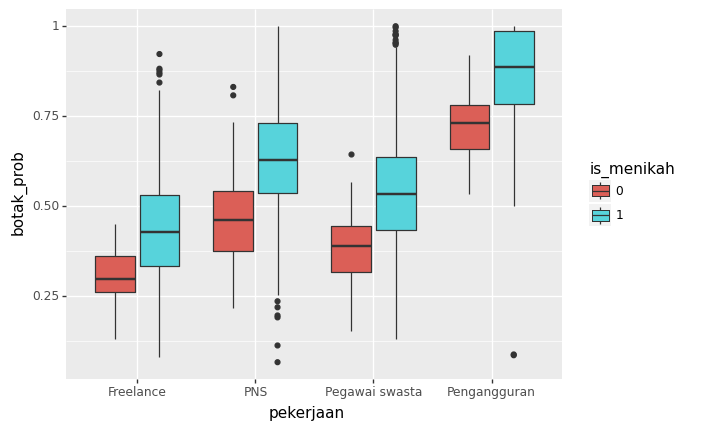

<ggplot: (8773295520633)>

In [ ]:
P3B1 = ggplot(data_botak, aes(x='pekerjaan', y='botak_prob', fill='is_menikah')) + geom_boxplot()
P3B1

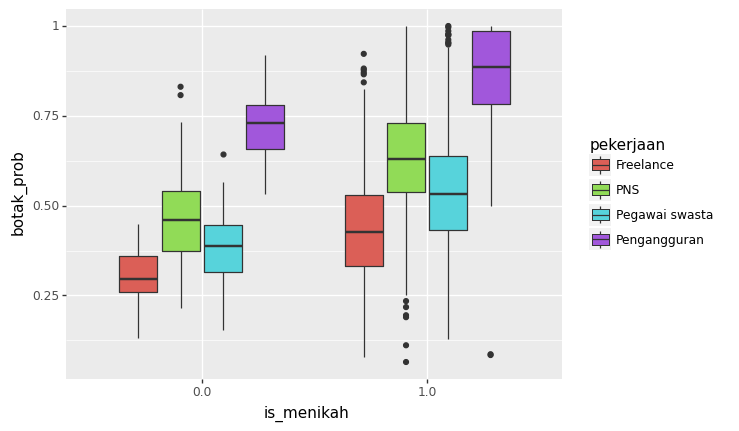

<ggplot: (8773295981769)>

In [ ]:
P3B2 = ggplot(data_botak, aes(x='is_menikah', y='botak_prob', fill='pekerjaan')) + geom_boxplot()
P3B2

###C. pekerjaan, is_merokok, dan botak_prob

In [ ]:
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')

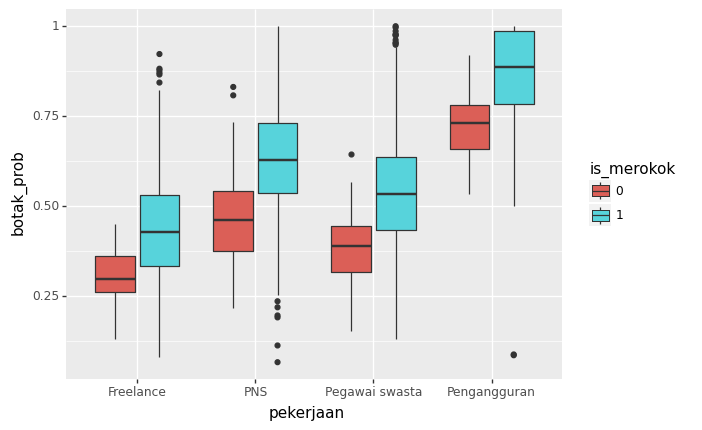

<ggplot: (8773298024545)>

In [ ]:
P3C1 = ggplot(data_botak, aes(x='pekerjaan', y='botak_prob', fill='is_merokok')) + geom_boxplot()
P3C1

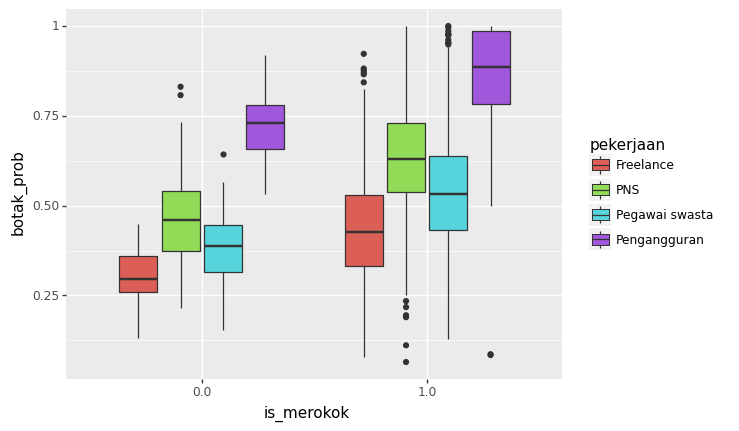

<ggplot: (8773295477305)>

In [ ]:
P3C2 = ggplot(data_botak, aes(x='is_merokok', y='botak_prob', fill='pekerjaan')) + geom_boxplot()
P3C2

##4. stress, is_keturunan, is_menikah, is_merokok, dan botak_prob

###A. stress, is_menikah, dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('category')
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

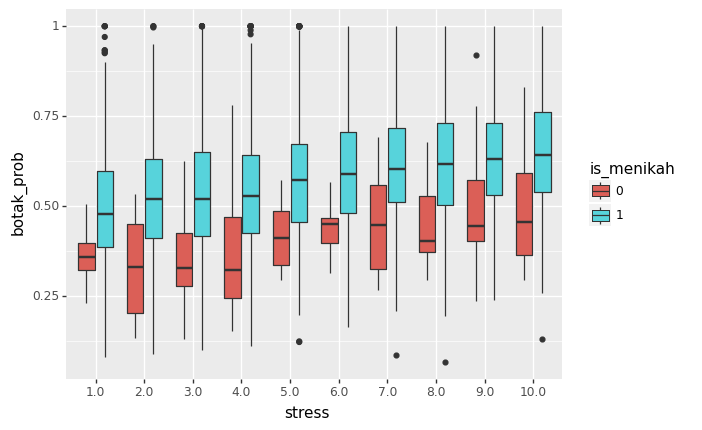

<ggplot: (8773295404705)>

In [ ]:
P4A1 = ggplot(data_botak, aes(x='stress', y='botak_prob', fill='is_menikah')) + geom_boxplot()
P4A1

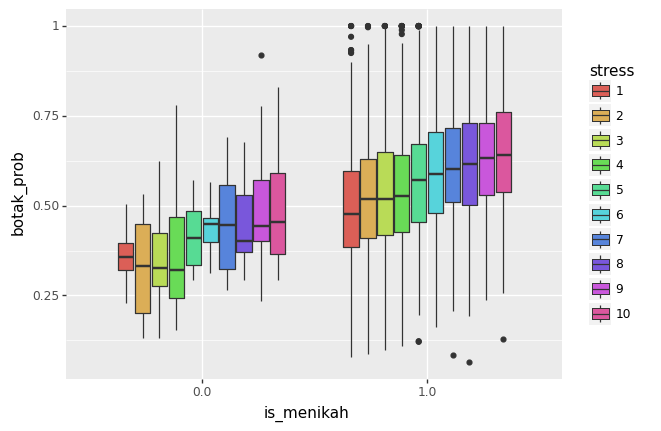

<ggplot: (8773295311157)>

In [ ]:
P4A2 = ggplot(data_botak, aes(x='is_menikah', y='botak_prob', fill='stress')) + geom_boxplot()
P4A2

###B. stress, is_keturunan, dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('category')
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

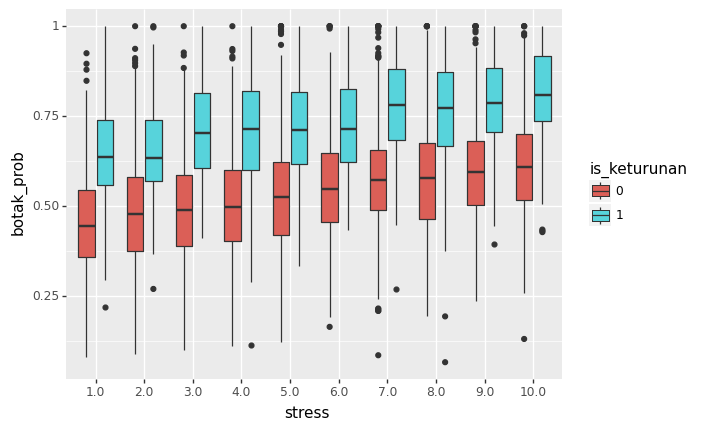

<ggplot: (8773295198201)>

In [ ]:
P4B1 = ggplot(data_botak, aes(x='stress', y='botak_prob', fill='is_keturunan')) + geom_boxplot()
P4B1

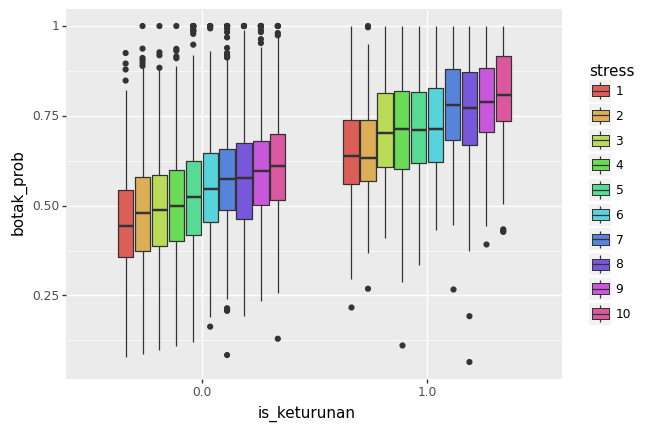

<ggplot: (8773295077073)>

In [ ]:
P4B2 = ggplot(data_botak, aes(x='is_keturunan', y='botak_prob', fill='stress')) + geom_boxplot()
P4B2

###C. stress, is_merokok, dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('category')
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')

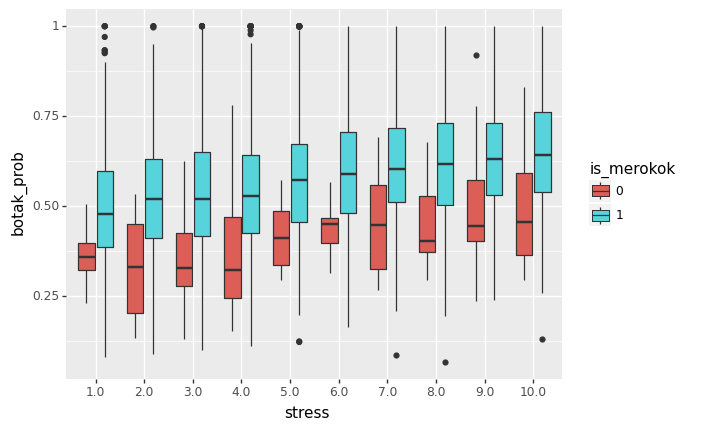

<ggplot: (8773294939373)>

In [ ]:
P4C1 = ggplot(data_botak, aes(x='stress', y='botak_prob', fill='is_merokok')) + geom_boxplot()
P4C1

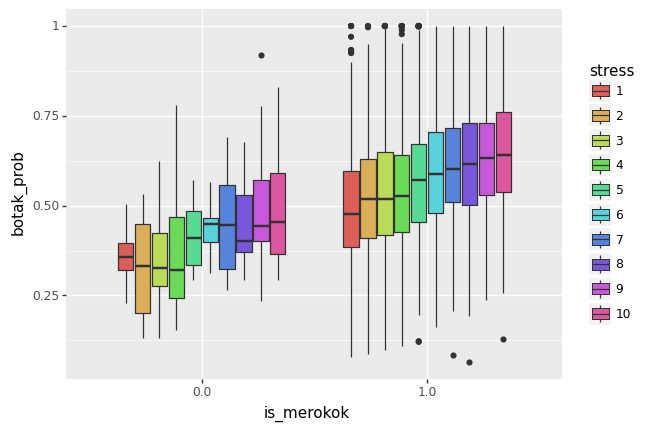

<ggplot: (8773294845457)>

In [ ]:
P4C2 = ggplot(data_botak, aes(x='is_merokok', y='botak_prob', fill='stress')) + geom_boxplot()
P4C2

##5. sampo, provinsi, jenis_kelamin, dan botak_prob

###A. sampo dan botak_prob

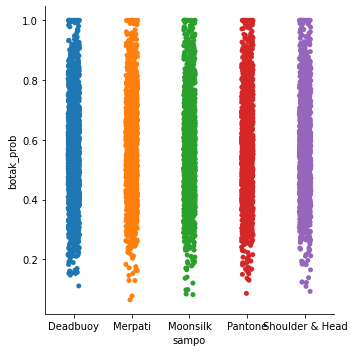

In [ ]:
P5A1 = sns.catplot(x="sampo", y="botak_prob", data=data_botak)
P5A1

###B. provinsi dan botak_prob

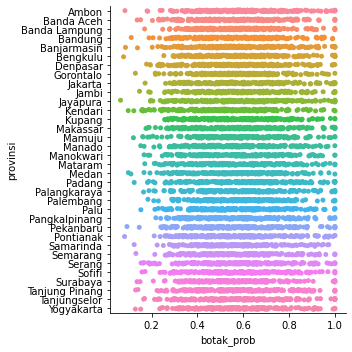

In [ ]:
P5B1 = sns.catplot(x="botak_prob", y="provinsi", data=data_botak)
P5B1

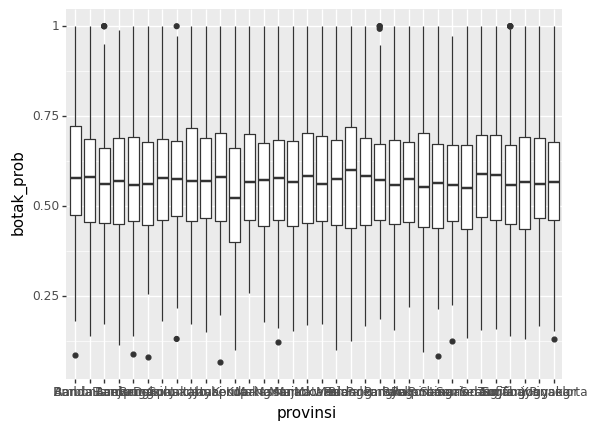

<ggplot: (8773295674029)>

In [ ]:
P5B2 = ggplot(data_botak, aes(x='provinsi', y='botak_prob')) + geom_boxplot()
P5B2

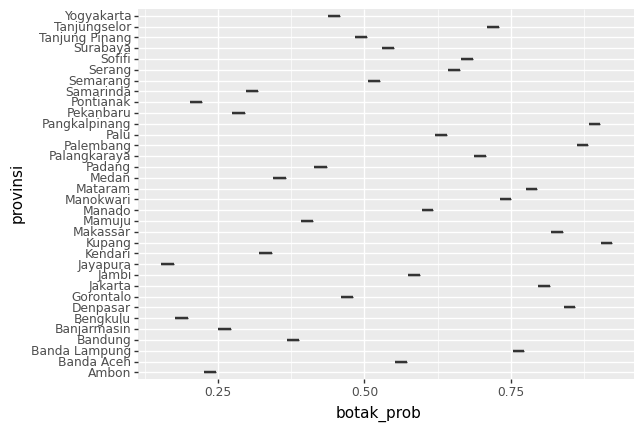

<ggplot: (8773295984097)>

In [ ]:
P5B3 = ggplot(data_botak, aes(x='botak_prob', y='provinsi')) + geom_boxplot()
P5B3

###C. sampo, provinsi, dan botak_prob

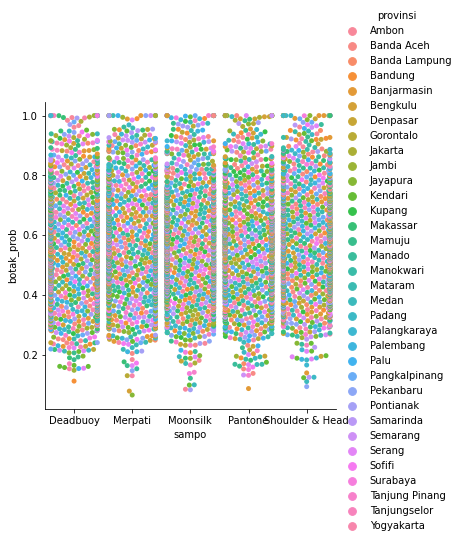

In [ ]:
P5C1 = sns.catplot(x="sampo", y="botak_prob", hue="provinsi", kind="swarm", data=data_botak)
P5C1

###D. jenis_kelamin, sampo, dan botak_prob

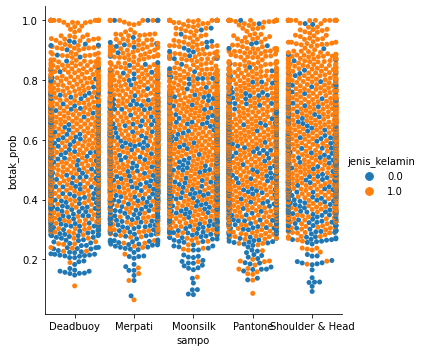

In [ ]:
P5D1 = sns.catplot(x="sampo", y="botak_prob", hue="jenis_kelamin", kind="swarm", data=data_botak)
P5D1

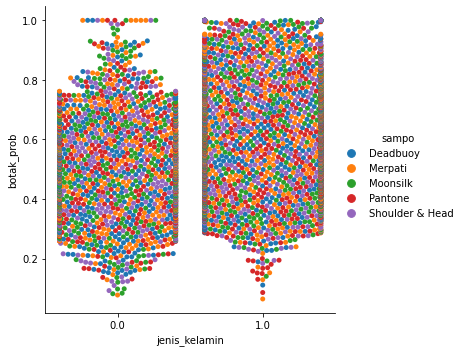

In [ ]:
P5D2 = sns.catplot(x="jenis_kelamin", y="botak_prob", hue="sampo", kind="swarm", data=data_botak)
P5D2

###E. jenis_kelamin, provinsi, dan botak_prob

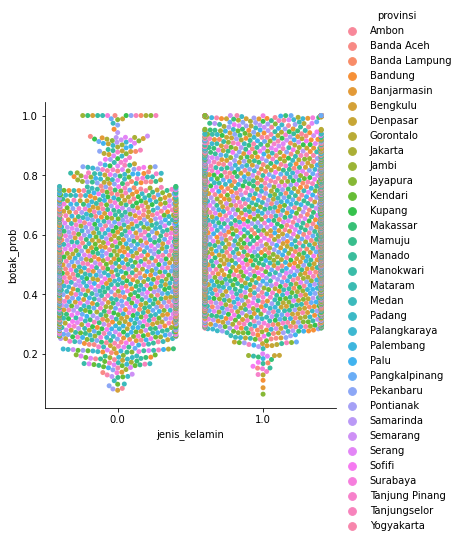

In [ ]:
P5E1 = sns.catplot(x="jenis_kelamin", y="botak_prob", hue="provinsi", kind="swarm", data=data_botak)
P5E1

##6. umur, is_keturunan, is_menikah, is_merokok, stress, dan botak_prob

###A. umur dan botak_prob

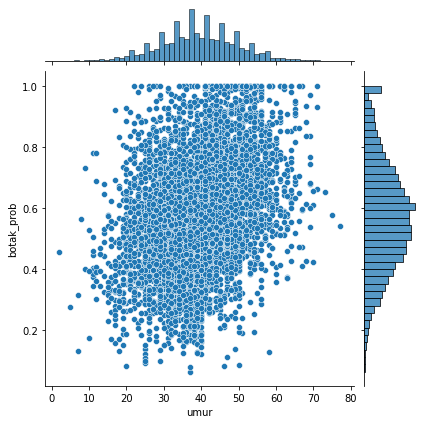

In [ ]:
P6A1 = sns.jointplot(x='umur', y='botak_prob', data = data_botak)
P6A1

###B. umur, is_keturunan, dan botak_prob

In [ ]:
data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('category')

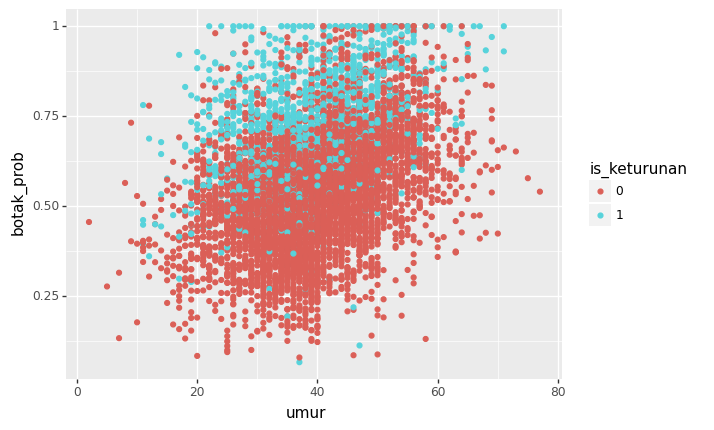

<ggplot: (8773294645629)>

In [ ]:
P6B1 = ggplot(data_botak, aes(x='umur', y='botak_prob', color='is_keturunan')) + geom_point()
P6B1

###C. umur, is_menikah, dan botak_prob

In [ ]:
data_botak['is_menikah'] = data_botak['is_menikah'].astype('category')

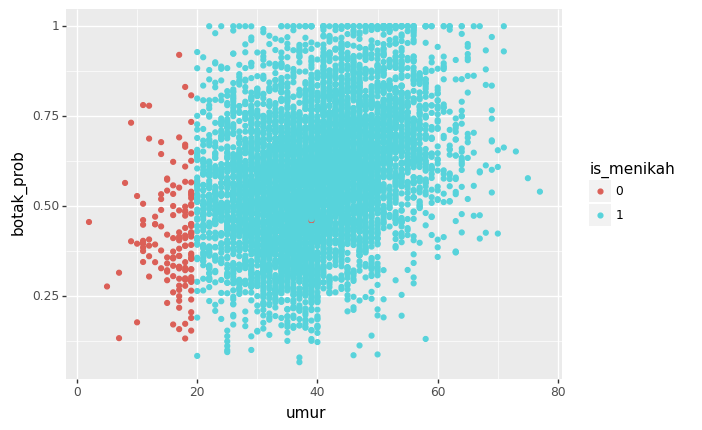

<ggplot: (8773294627033)>

In [ ]:
P6C1 = ggplot(data_botak, aes(x='umur', y='botak_prob', color='is_menikah')) + geom_point()
P6C1

###D. umur, is_merokok, dan botak_prob

In [ ]:
data_botak['is_merokok'] = data_botak['is_merokok'].astype('category')

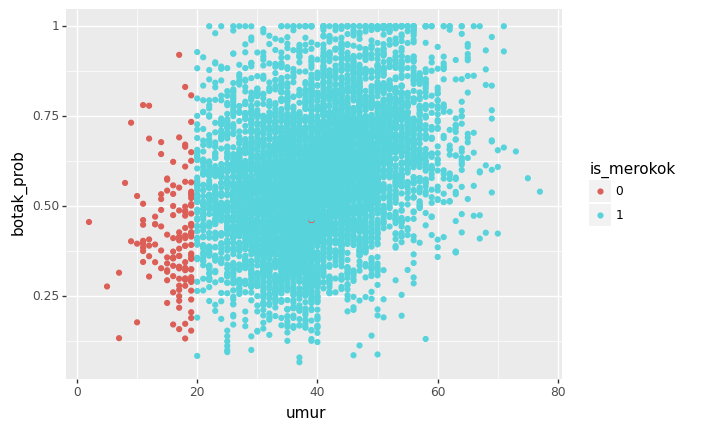

<ggplot: (8773295930645)>

In [ ]:
P6D1 = ggplot(data_botak, aes(x='umur', y='botak_prob', color='is_merokok')) + geom_point()
P6D1

###E. umur, stress, dan botak_prob

In [ ]:
data_botak['stress'] = data_botak['stress'].astype('category')

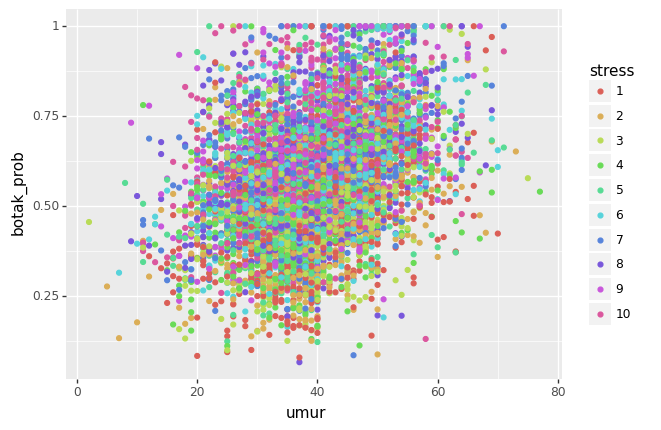

<ggplot: (8773295051497)>

In [ ]:
P6E1 = ggplot(data_botak, aes(x='umur', y='botak_prob', color='stress')) + geom_point()
P6E1

##7. pendidikan, pekerjaan, sampo, dan botak_prob

###A. pendidikan dan botak_prob

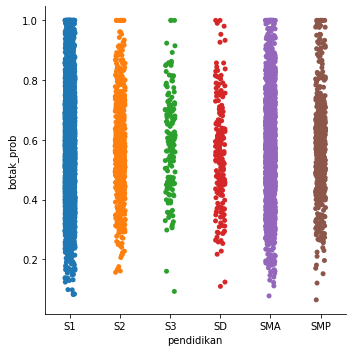

In [ ]:
P7A1 = sns.catplot(x="pendidikan", y="botak_prob", data=data_botak)
P7A1

###B. pendidikan, pekerjaan, dan botak_prob

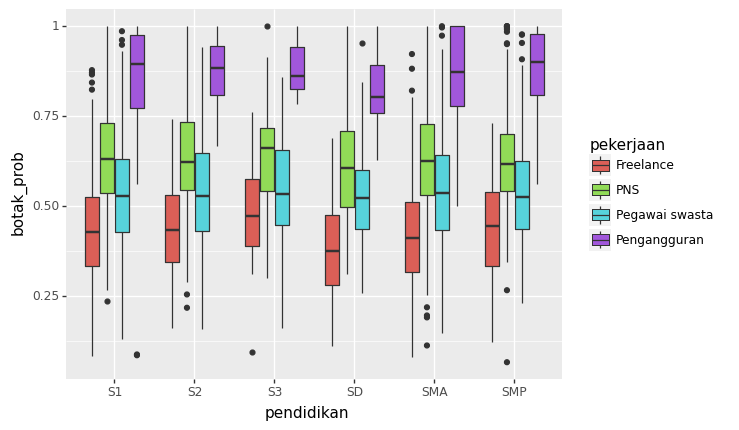

<ggplot: (8773295226869)>

In [ ]:
P7B1 = ggplot(data_botak, aes(x='pendidikan', y='botak_prob', fill='pekerjaan')) + geom_boxplot()
P7B1

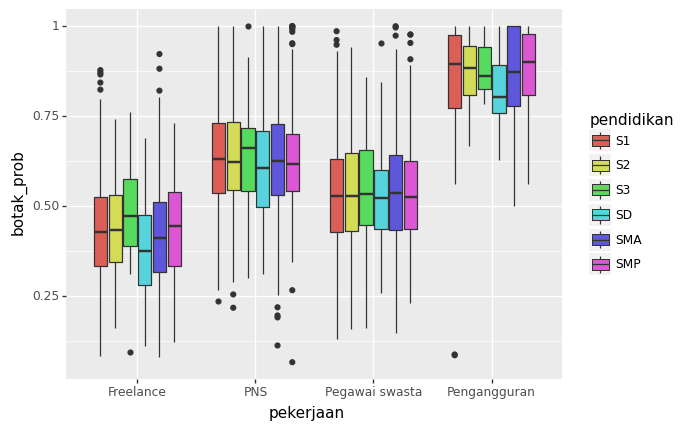

<ggplot: (8773295421077)>

In [ ]:
P7B2 = ggplot(data_botak, aes(x='pekerjaan', y='botak_prob', fill='pendidikan')) + geom_boxplot()
P7B2

###C. pendidikan, sampo, dan botak_prob

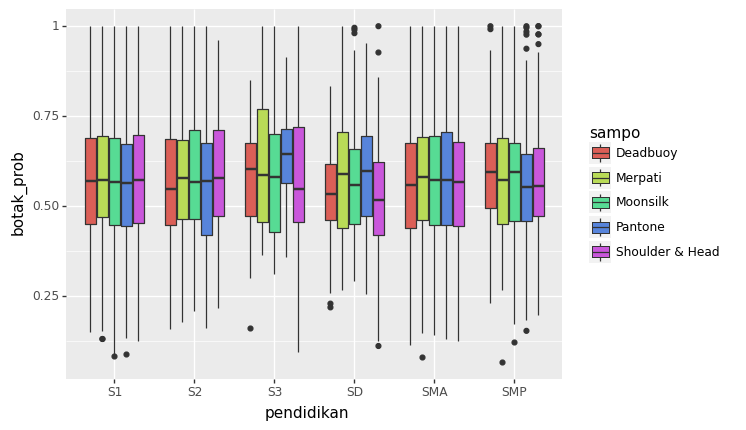

<ggplot: (8745990079417)>

In [ ]:
P7C1 = ggplot(data_botak, aes(x='pendidikan', y='botak_prob', fill='sampo')) + geom_boxplot()
P7C1

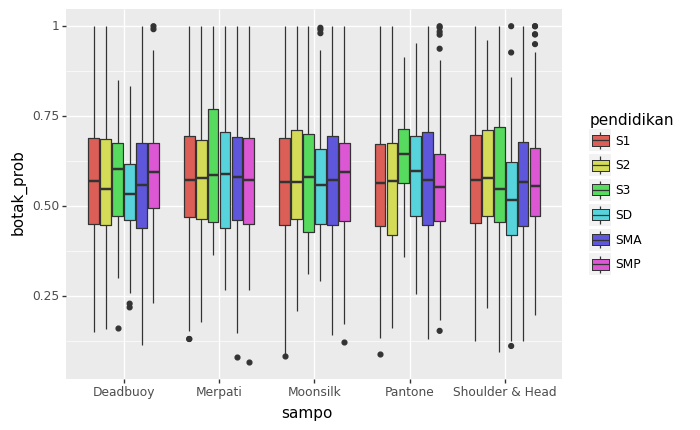

<ggplot: (8745992996797)>

In [ ]:
P7C1 = ggplot(data_botak, aes(x='sampo', y='botak_prob', fill='pendidikan')) + geom_boxplot()
P7C1

##8. berat, tinggi, jenis_kelamin, botak_prob

###A. berat dan botak_prob

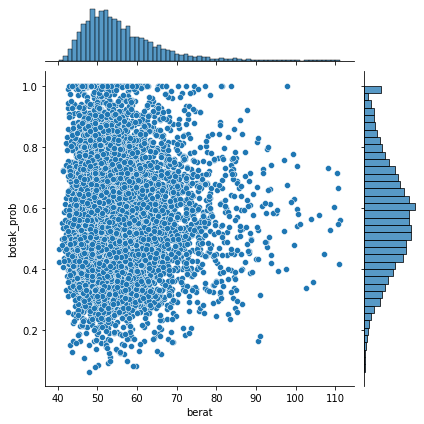

In [ ]:
P7A1 = sns.jointplot(x='berat', y='botak_prob', data = data_botak)

###B. tinggi dan botak_prob

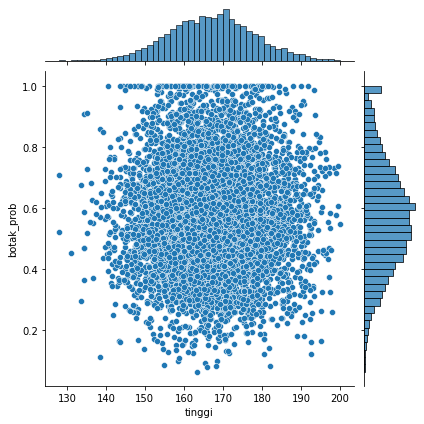

In [ ]:
P7B1 = sns.jointplot(x='tinggi', y='botak_prob', data = data_botak)

###C. berat, jenis_kelamin, dan botak_prob

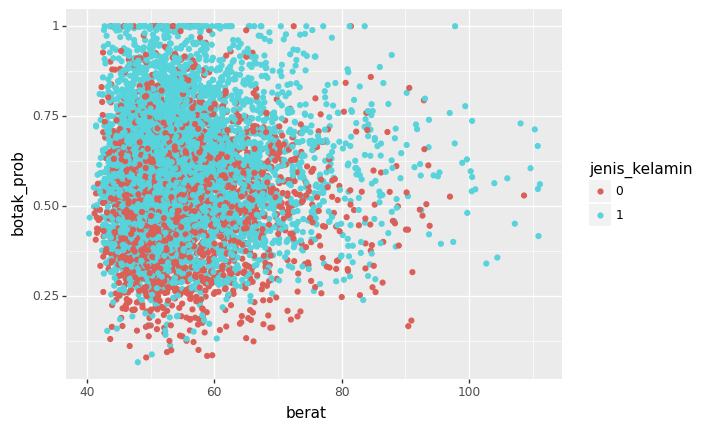

<ggplot: (8773294334177)>

In [ ]:
P7C1 = ggplot(data_botak, aes(x='berat', y='botak_prob', color='jenis_kelamin')) + geom_point()
P7C1

###D. tinggi, jenis_kelamin, dan botak_prob

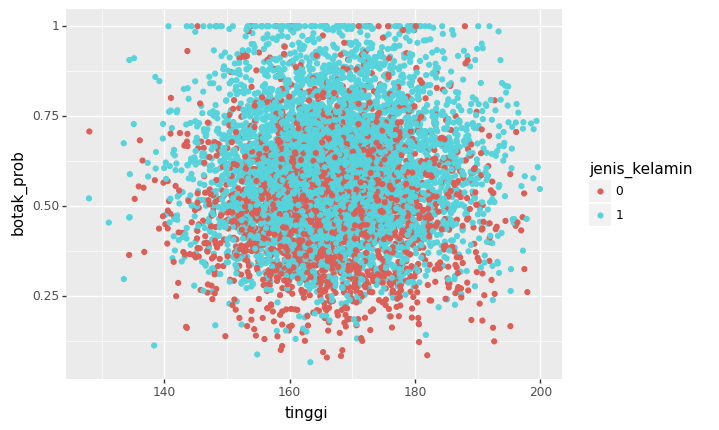

<ggplot: (8773294280453)>

In [ ]:
P7D1 = ggplot(data_botak, aes(x='tinggi', y='botak_prob', color='jenis_kelamin')) + geom_point()
P7D1

# <h1> Drop Variabel </h1>

###Karena variabel provinsi ternyata tidak bisa memberikan informasi yang jelas melalui visualisasi, maka variabel tersebut akan didrop

In [ ]:
try:
  data_botak.drop(['provinsi'], axis = 1, inplace = True)
except Exception as err_:
  print(err_)
print('Done')

Done


###Variabel numerik seperti umur, dll yang sudah dinormalisasi dan distandarisasi akan didrop agar memudahkan pembuatan model untuk regresi linier di R nanti

In [ ]:
try:
  data_botak.drop(['umur', 'gaji', 'berat', 'tinggi'], axis = 1, inplace = True)
except Exception as err_:
  print(err_)
print('Done')

Done


###Variabel kategorik yang berisikan angka-angka encode akan diubah ke numerik untuk memudahkan pembuatan model untuk regresi linier di R nanti

In [ ]:
try:
  data_botak['stress'] = data_botak['stress'].astype('float64')
  data_botak['jenis_kelamin'] = data_botak['jenis_kelamin'].astype('float64')
  data_botak['is_menikah'] = data_botak['is_menikah'].astype('float64')
  data_botak['is_keturunan'] = data_botak['is_keturunan'].astype('float64')
  data_botak['is_merokok'] = data_botak['is_merokok'].astype('float64')
except Exception as err_:
  print(err_)
print('Done')

Done


In [ ]:
data_botak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   jenis_kelamin  7041 non-null   float64 
 1   pekerjaan      7041 non-null   category
 2   is_menikah     7041 non-null   float64 
 3   is_keturunan   7041 non-null   float64 
 4   sampo          7041 non-null   category
 5   is_merokok     7041 non-null   float64 
 6   pendidikan     7041 non-null   category
 7   stress         7041 non-null   float64 
 8   botak_prob     7041 non-null   float64 
 9   berat_nrm      7041 non-null   float64 
 10  tinggi_nrm     7041 non-null   float64 
 11  umur_std       7041 non-null   float64 
 12  gaji_std       7041 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 884.4 KB


In [ ]:
data_botak.head(10)

jenis_kelamin  is_menikah  is_keturunan  is_merokok  stress  botak_prob  \
0            0.0         1.0           0.0         1.0     5.0    0.605974   
1            0.0         1.0           0.0         1.0     7.0    0.532860   
2            0.0         1.0           0.0         1.0     4.0    0.418442   
3            0.0         1.0           0.0         1.0     9.0    0.804050   
4            1.0         1.0           0.0         1.0     1.0    0.368371   
5            0.0         1.0           1.0         1.0     1.0    0.732562   
6            0.0         1.0           0.0         1.0     2.0    0.192604   
7            1.0         1.0           0.0         1.0     3.0    0.540582   
8            1.0         1.0           0.0         1.0     6.0    0.367960   
9            0.0         1.0           0.0         1.0     4.0    0.403653   

   berat_nrm  tinggi_nrm  umur_std  gaji_std  pekerjaan_enc  sampo_enc  \
0   0.197682    0.589808 -1.265783 -0.191391            1.0        1.0   
1   0.459814    0.521724  1.369575 -0.263922            1.0        1.0   
2   0.084776    0.369798 -0.252183 -0.486438            2.0        0.0   
3   0.158482    0.546887 -0.353543 -1.159939            3.0        2.0   
4   0.288248    0.521511 -0.150823 -0.621869            0.0        3.0   
5   0.197286    0.712212  1.572295  0.089294            1.0        1.0   
6   0.204883    0.687138  0.051896  0.417807            0.0        4.0   
7   0.486958    0.591370  0.761416 -0.962444            2.0        4.0   
8   0.208057    0.405834  0.153256  0.230889            0.0        1.0   
9   0.175783    0.644969  0.660056  0.099218            0.0        4.0   

   pendidikan_enc  
0             3.0  
1             3.0  
2             3.0  
3             0.0  
4             4.0  
5             3.0  
6             3.0  
7             4.0  
8             2.0  
9             3.0

# <h1> Mengencode variabel pekerjaan, sampo, dan pendidikan </h1>

In [ ]:
#Membuat encoding dari variabel pekerjaan, sampo, dan pendidikan
data_botak2 = pd.get_dummies(data_botak, columns=["pekerjaan", "sampo", "pendidikan"], drop_first = True)
data_botak2.head()

jenis_kelamin  is_menikah  is_keturunan  is_merokok  stress  botak_prob  \
0            0.0         1.0           0.0         1.0     5.0    0.605974   
1            0.0         1.0           0.0         0.0     7.0    0.532860   
2            0.0         1.0           0.0         0.0     4.0    0.418442   
3            0.0         1.0           0.0         1.0     9.0    0.804050   
4            1.0         1.0           0.0         1.0     1.0    0.368371   

   berat_nrm  tinggi_nrm  umur_std  gaji_std  ...  pekerjaan_Pengangguran  \
0   0.197682    0.589808 -1.265783 -0.191391  ...                       0   
1   0.459814    0.521724  1.369575 -0.263922  ...                       0   
2   0.084776    0.369798 -0.252183 -0.486438  ...                       0   
3   0.158482    0.546887 -0.353543 -1.159939  ...                       1   
4   0.288248    0.521511 -0.150823 -0.621869  ...                       0   

   sampo_Merpati  sampo_Moonsilk  sampo_Pantone  sampo_Shoulder & Head  \
0              0               0              1                      0   
1              0               0              1                      0   
2              0               1              0                      0   
3              0               0              0                      0   
4              1               0              0                      0   

   pendidikan_S2  pendidikan_S3  pendidikan_SD  pendidikan_SMA  pendidikan_SMP  
0              0              0              0               0               0  
1              0              0              0               0               0  
2              0              0              0               0               0  
3              0              0              1               0               0  
4              1              0              0               0               0  

[5 rows x 22 columns]

In [ ]:
data_botak2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   jenis_kelamin             7041 non-null   float64
 1   is_menikah                7041 non-null   float64
 2   is_keturunan              7041 non-null   float64
 3   is_merokok                7041 non-null   float64
 4   stress                    7041 non-null   float64
 5   botak_prob                7041 non-null   float64
 6   berat_nrm                 7041 non-null   float64
 7   tinggi_nrm                7041 non-null   float64
 8   umur_std                  7041 non-null   float64
 9   gaji_std                  7041 non-null   float64
 10  pekerjaan_PNS             7041 non-null   uint8  
 11  pekerjaan_Pegawai swasta  7041 non-null   uint8  
 12  pekerjaan_Pengangguran    7041 non-null   uint8  
 13  sampo_Merpati             7041 non-null   uint8  
 14  sampo_Mo

In [ ]:
tambahan = data_botak2.loc[:,["pekerjaan_PNS","pekerjaan_Pegawai swasta", "pekerjaan_Pengangguran", "sampo_Merpati", "sampo_Moonsilk", "sampo_Pantone", "sampo_Shoulder & Head", "pendidikan_S2", "pendidikan_S3", "pendidikan_SD", "pendidikan_SMA", "pendidikan_SMP"]]
tambahan

pekerjaan_PNS  pekerjaan_Pegawai swasta  pekerjaan_Pengangguran  \
0                 1                         0                       0   
1                 1                         0                       0   
2                 0                         1                       0   
3                 0                         0                       1   
4                 0                         0                       0   
...             ...                       ...                     ...   
7830              1                         0                       0   
7831              1                         0                       0   
7832              1                         0                       0   
7833              0                         1                       0   
7834              0                         1                       0   

      sampo_Merpati  sampo_Moonsilk  sampo_Pantone  sampo_Shoulder & Head  \
0                 0               0              1                      0   
1                 0               0              1                      0   
2                 0               1              0                      0   
3                 0               0              0                      0   
4                 1               0              0                      0   
...             ...             ...            ...                    ...   
7830              0               0              0                      0   
7831              0               0              1                      0   
7832              0               1              0                      0   
7833              0               0              1                      0   
7834              0               0              0                      0   

      pendidikan_S2  pendidikan_S3  pendidikan_SD  pendidikan_SMA  \
0                 0              0              0               0   
1                 0              0              0               0   
2                 0              0              0               0   
3                 0              0              1               0   
4                 1              0              0               0   
...             ...            ...            ...             ...   
7830              0              0              0               1   
7831              0              0              0               0   
7832              0              0              0               1   
7833              0              0              0               1   
7834              1              0              0               0   

      pendidikan_SMP  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
7830               0  
7831               0  
7832               0  
7833               0  
7834               0  

[7041 rows x 12 columns]

In [ ]:
data_botak3 = pd.concat([data_botak, tambahan], axis=1, join='inner')
data_botak3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   jenis_kelamin             7041 non-null   float64 
 1   pekerjaan                 7041 non-null   category
 2   is_menikah                7041 non-null   float64 
 3   is_keturunan              7041 non-null   float64 
 4   sampo                     7041 non-null   category
 5   is_merokok                7041 non-null   float64 
 6   pendidikan                7041 non-null   category
 7   stress                    7041 non-null   float64 
 8   botak_prob                7041 non-null   float64 
 9   berat_nrm                 7041 non-null   float64 
 10  tinggi_nrm                7041 non-null   float64 
 11  umur_std                  7041 non-null   float64 
 12  gaji_std                  7041 non-null   float64 
 13  pekerjaan_PNS             7041 non-null   uint8 

In [ ]:
nama_kolom = ["jenis_kelamin", "umur_std", "berat_nrm", "tinggi_nrm","pekerjaan", "pekerjaan_PNS","pekerjaan_Pegawai swasta", "pekerjaan_Pengangguran", "sampo", "sampo_Merpati", "sampo_Moonsilk", "sampo_Pantone", "sampo_Shoulder & Head", 
              "pendidikan", "pendidikan_S2", "pendidikan_S3", "pendidikan_SD", "pendidikan_SMA", "pendidikan_SMP", "is_menikah", "is_keturunan", "is_merokok", "stress", "gaji_std", "botak_prob"]
data_botak3 = data_botak3.reindex(columns = nama_kolom)

In [ ]:
data_botak3.head()

jenis_kelamin       pekerjaan  is_menikah  is_keturunan     sampo  \
0            0.0             PNS         1.0           0.0   Pantone   
1            0.0             PNS         1.0           0.0   Pantone   
2            0.0  Pegawai swasta         1.0           0.0  Moonsilk   
3            0.0    Pengangguran         1.0           0.0  Deadbuoy   
4            1.0       Freelance         1.0           0.0   Merpati   

   is_merokok pendidikan  stress  botak_prob  berat_nrm  ...  \
0         1.0         S1     5.0    0.605974   0.197682  ...   
1         0.0         S1     7.0    0.532860   0.459814  ...   
2         0.0         S1     4.0    0.418442   0.084776  ...   
3         1.0         SD     9.0    0.804050   0.158482  ...   
4         1.0         S2     1.0    0.368371   0.288248  ...   

   pekerjaan_Pengangguran  sampo_Merpati  sampo_Moonsilk  sampo_Pantone  \
0                       0              0               0              1   
1                       0              0               0              1   
2                       0              0               1              0   
3                       1              0               0              0   
4                       0              1               0              0   

   sampo_Shoulder & Head  pendidikan_S2  pendidikan_S3  pendidikan_SD  \
0                      0              0              0              0   
1                      0              0              0              0   
2                      0              0              0              0   
3                      0              0              0              1   
4                      0              1              0              0   

   pendidikan_SMA  pendidikan_SMP  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 25 columns]

In [ ]:
try:
  data_botak3["pekerjaan_PNS"] = data_botak3["pekerjaan_PNS"].astype("float64")
  data_botak3["pekerjaan_Pegawai swasta"] = data_botak3["pekerjaan_Pegawai swasta"].astype("float64")
  data_botak3["pekerjaan_Pengangguran"] = data_botak3["pekerjaan_Pengangguran"].astype("float64")
  data_botak3["sampo_Merpati"] = data_botak3["sampo_Merpati"].astype("float64")
  data_botak3["sampo_Moonsilk"] = data_botak3["sampo_Moonsilk"].astype("float64")
  data_botak3["sampo_Pantone"] = data_botak3["sampo_Pantone"].astype("float64")
  data_botak3["sampo_Shoulder & Head"] = data_botak3["sampo_Shoulder & Head"].astype("float64")
  data_botak3["pendidikan_S2"] = data_botak3["pendidikan_S2"].astype("float64")
  data_botak3["pendidikan_S3"] = data_botak3["pendidikan_S3"].astype("float64")
  data_botak3["pendidikan_SD"] = data_botak3["pendidikan_SD"].astype("float64")
  data_botak3["pendidikan_SMP"] = data_botak3["pendidikan_SMP"].astype("float64")
  data_botak3["pendidikan_SMA"] = data_botak3["pendidikan_SMA"].astype("float64")
except Exception as err_:
  print(err_)
print('Done')

Done


In [ ]:
data_botak3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7834
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   jenis_kelamin             7041 non-null   float64 
 1   umur_std                  7041 non-null   float64 
 2   berat_nrm                 7041 non-null   float64 
 3   tinggi_nrm                7041 non-null   float64 
 4   pekerjaan                 7041 non-null   category
 5   pekerjaan_PNS             7041 non-null   float64 
 6   pekerjaan_Pegawai swasta  7041 non-null   float64 
 7   pekerjaan_Pengangguran    7041 non-null   float64 
 8   sampo                     7041 non-null   category
 9   sampo_Merpati             7041 non-null   float64 
 10  sampo_Moonsilk            7041 non-null   float64 
 11  sampo_Pantone             7041 non-null   float64 
 12  sampo_Shoulder & Head     7041 non-null   float64 
 13  pendidikan                7041 non-null   catego

# <h1> Menyimpan data akhir </h1>

In [ ]:
#Dataset akan disimpan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_botak3.to_csv('/content/drive/MyDrive/Kuliah/Datasets/botak_bersih_final.csv', index = False, encoding = 'utf8')